# IMPORTANDO LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## **Objetivo: Predecir el consumo de electricidad**

# **EXPLORACIÓN INICIAL**

In [2]:
df = pd.read_csv('../Data/datos_seattle.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30657 entries, 0 to 30656
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   30657 non-null  int64  
 1   datayear                        30657 non-null  int64  
 2   buildingname                    30657 non-null  object 
 3   buildingtype                    30657 non-null  object 
 4   taxparcelidentificationnumber   30657 non-null  object 
 5   address                         30657 non-null  object 
 6   city                            30657 non-null  object 
 7   state                           30657 non-null  object 
 8   zipcode                         30657 non-null  int64  
 9   latitude                        30657 non-null  float64
 10  longitude                       30657 non-null  float64
 11  neighborhood                    30657 non-null  object 
 12  councildistrictcode             

🎇 **Observación**

Tenemos 45 columnas en donde dominan las numericas 32 y las demás son objects

## **Nulos**

In [4]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

steamuse_kbtu                     96.552174
thirdlargestpropertyusetypegfa    78.706331
thirdlargestpropertyusetype       78.181166
secondlargestpropertyusetype      42.871122
secondlargestpropertyuse          42.871122
naturalgas_kbtu                   37.475944
naturalgas_therms                 37.475944
energystarscore                   25.958182
siteeuiwn_kbtu_sf                  3.937111
sourceeuiwn_kbtu_sf                3.937111
siteenergyusewn_kbtu               3.920801
siteeui_kbtu_sf                    2.925922
sourceeui_kbtu_sf                  2.925922
siteenergyuse_kbtu                 2.909613
electricity_kwh                    1.895163
electricity_kbtu                   1.891901
ghgemissionsintensity              1.630949
totalghgemissions                  1.624425
complianceissue                    1.063379
numberofbuildings                  0.958998
numberoffloors                     0.270738
largestpropertyusetype             0.153309
largestpropertyusetypegfa       

🎇 **Observación**
Al analizar el conjunto de datos, se observa que las columnas `ThirdLargestPropertyUseTypeGFA`, `ThirdLargestPropertyUseType`, `SecondLargestPropertyUseType` y `SecondLargestPropertyUse` presentan un alto porcentaje de valores nulos, específicamente 78.7% y 42.9% respectivamente. Además, dado que el objetivo principal es predecir el consumo total de energía, estas variables no aportan información relevante para el análisis.

Consideraciones:

- Alto porcentaje de datos faltantes: Columnas con un elevado número de valores nulos pueden introducir sesgos y reducir la precisión del modelo. Cuando una variable tiene más del 80% de datos faltantes, es común considerar su eliminación para mantener la integridad del análisis. ​
Medium

- Relevancia para el modelo: Dado que el interés se centra en predecir el consumo total de energía, y estas columnas están relacionadas con usos secundarios o terciarios de la propiedad, su contribución al modelo es limitada.

🎓 **Conclusión**:

Debido al alto porcentaje de valores nulos y a su baja relevancia para el objetivo del análisis, procederé a eliminar las columnas ThirdLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, SecondLargestPropertyUseType y SecondLargestPropertyUse del conjunto de datos. Esta acción permitirá simplificar el modelo y mejorar su rendimiento al centrarse en variables más completas y pertinentes.





In [5]:
# Generando un treshold del 37 % de nulos
treshold = 37

# Generando una serie donde como indice esten las columnas y como valores los porcentajes de nulos
serie_a_eliminar = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

# Sacando los indices para obtener las columnas a eliminar
columnas_a_eliminar = serie_a_eliminar[serie_a_eliminar>treshold].index.to_list()

# Elimiando las columnas
df.drop(columns=columnas_a_eliminar, inplace=True)

In [6]:
series_nulos = df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]
series_nulos

energystarscore                  25.958182
siteeuiwn_kbtu_sf                 3.937111
sourceeuiwn_kbtu_sf               3.937111
siteenergyusewn_kbtu              3.920801
siteeui_kbtu_sf                   2.925922
sourceeui_kbtu_sf                 2.925922
siteenergyuse_kbtu                2.909613
electricity_kwh                   1.895163
electricity_kbtu                  1.891901
ghgemissionsintensity             1.630949
totalghgemissions                 1.624425
complianceissue                   1.063379
numberofbuildings                 0.958998
numberoffloors                    0.270738
largestpropertyusetype            0.153309
largestpropertyusetypegfa         0.137000
epapropertytype                   0.127214
taxparcelidentificationnumber     0.000000
address                           0.000000
buildingname                      0.000000
datayear                          0.000000
osebuildingid                     0.000000
buildingtype                      0.000000
city       

☀️ **Inputación**

Con la eliminación de nuestras columnas con muchos nulos tenemos columnas que realizaremos imputación pero primeramente tendremos que ver como son las distribuciones de estas para saber con que imputar.

energystarscore
siteeuiwn_kbtu_sf
sourceeuiwn_kbtu_sf
siteenergyusewn_kbtu
siteeui_kbtu_sf
sourceeui_kbtu_sf
siteenergyuse_kbtu
electricity_kwh
electricity_kbtu
ghgemissionsintensity
totalghgemissions
complianceissue
numberofbuildings
numberoffloors
largestpropertyusetype
largestpropertyusetypegfa
epapropertytype


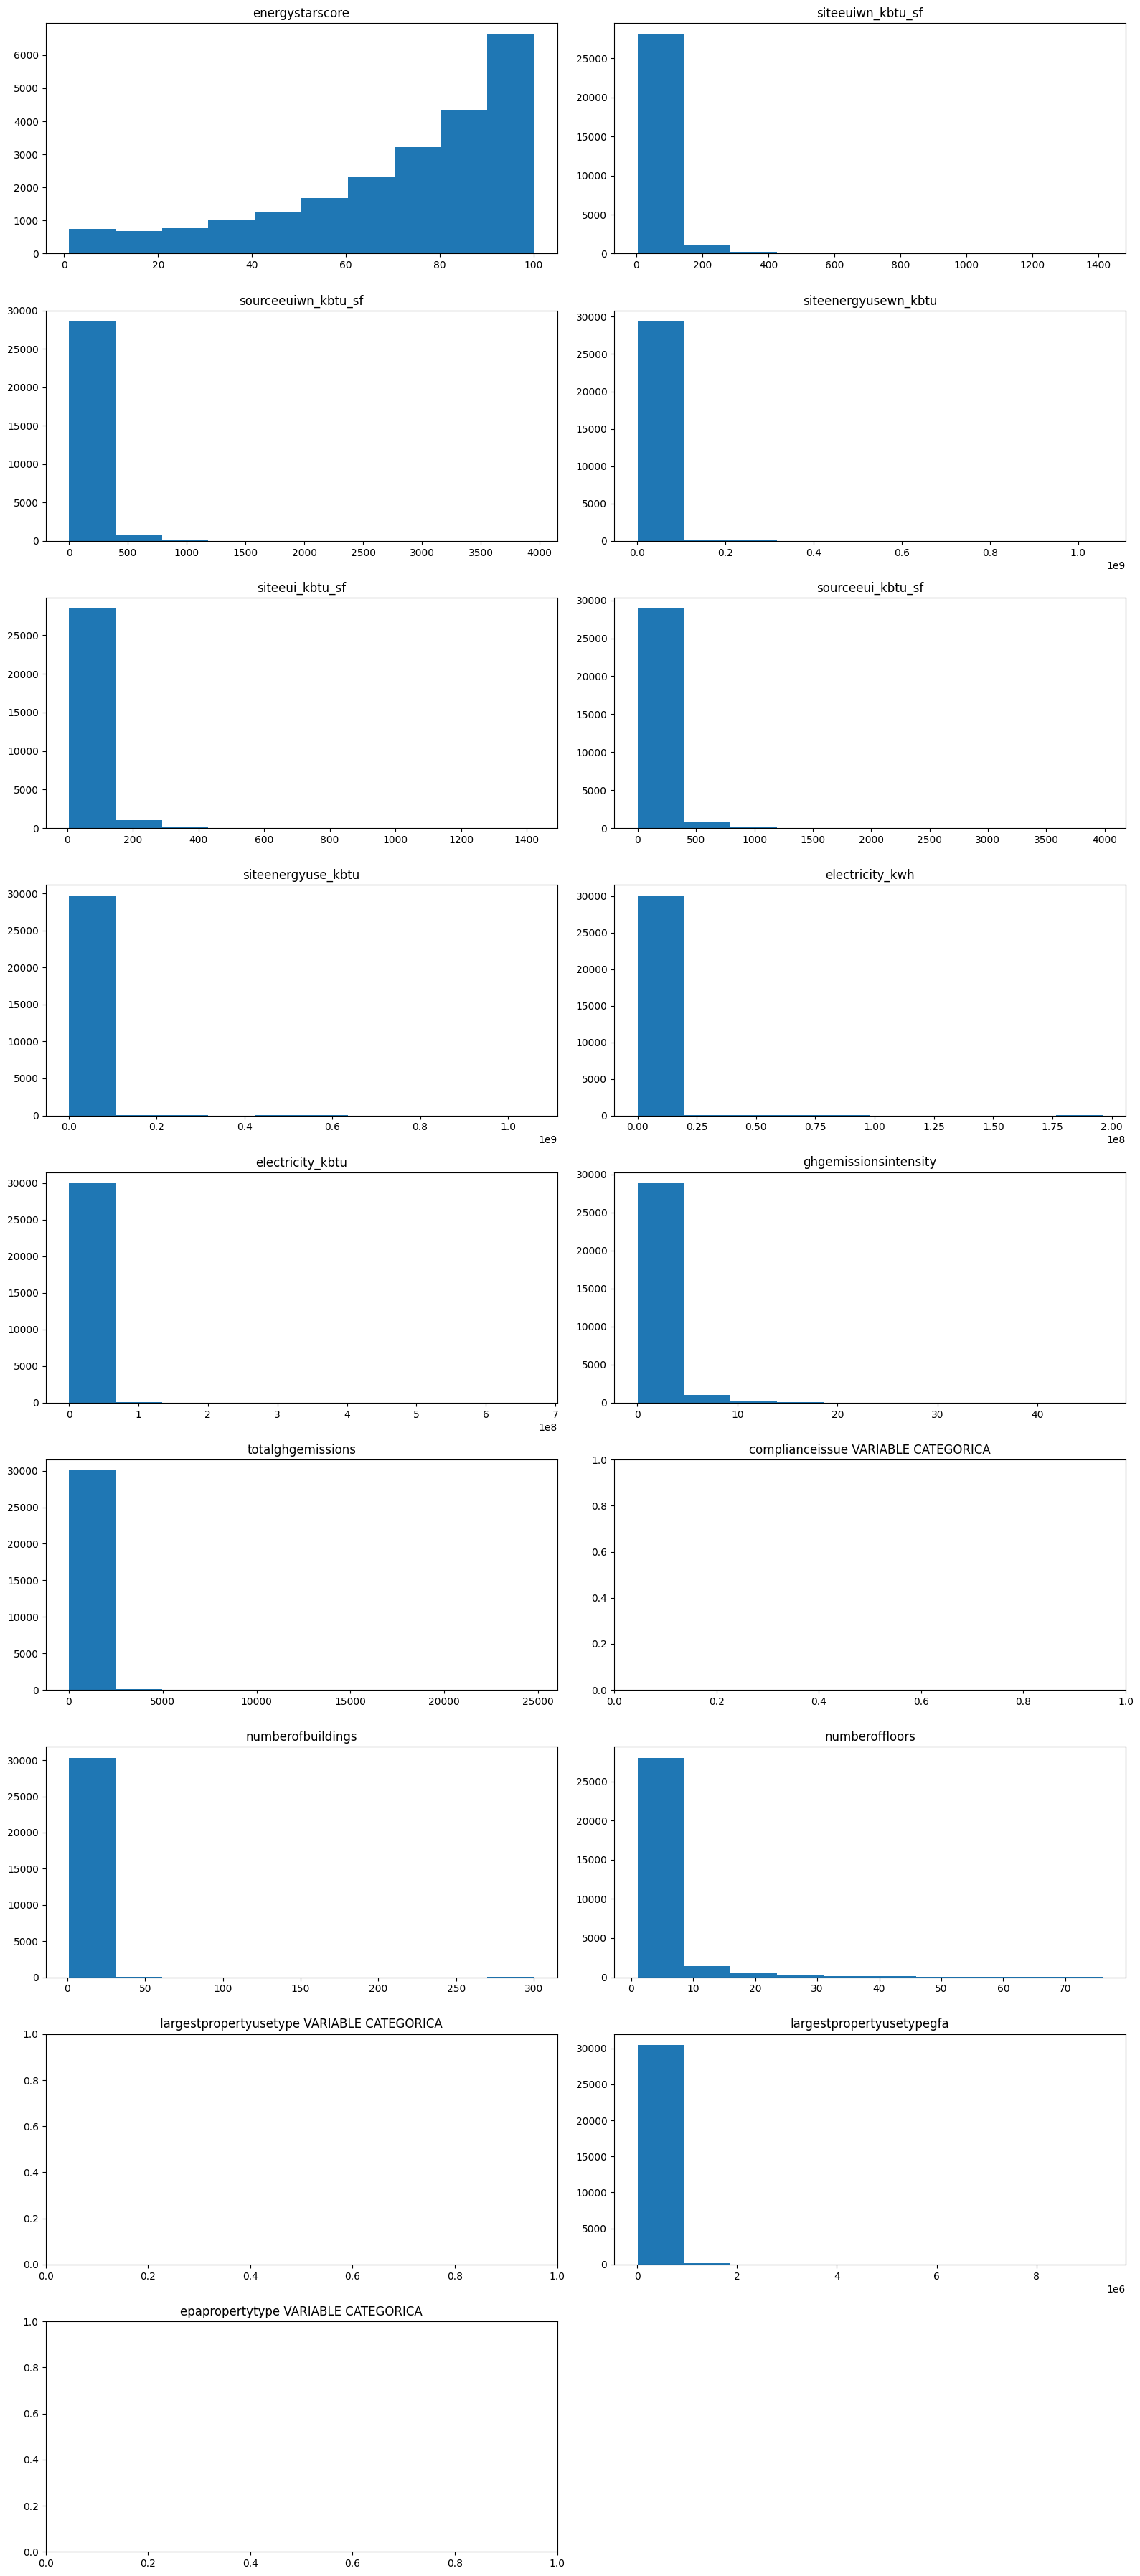

In [7]:
# Establecemos el treshold en 0 para que la condición sera mayor que cero
treshold = 0

col_names = series_nulos[series_nulos>treshold].index.to_list()
graficos_len =len(col_names)

ncols = 2
nrows = int(np.ceil(graficos_len / ncols))


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(col_names):
    print(col_name)
    # Graficar un histograma, por ejemplo
    if df[col_name].dtype in (int, float):
        axes[i].hist(df[col_name])
        axes[i].set_title(col_name)
    else:
     
        axes[i].set_title(col_name + ' VARIABLE CATEGORICA')


# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



In [8]:
df['energystarscore'].skew()  # > 0 → cola a la derecha

np.float64(-1.030452950138382)

In [9]:
for col in col_names:
    if df[col].dtype in (int, float):
        print(f' El skew es de {col} es de  {df[col].skew()}')


 El skew es de energystarscore es de  -1.030452950138382
 El skew es de siteeuiwn_kbtu_sf es de  6.114920483095069
 El skew es de sourceeuiwn_kbtu_sf es de  8.610147221337071
 El skew es de siteenergyusewn_kbtu es de  21.26039760816271
 El skew es de siteeui_kbtu_sf es de  6.175710962153167
 El skew es de sourceeui_kbtu_sf es de  8.633048498620461
 El skew es de siteenergyuse_kbtu es de  22.555340192154553
 El skew es de electricity_kwh es de  24.782205217532315
 El skew es de electricity_kbtu es de  24.78252846889467
 El skew es de ghgemissionsintensity es de  4.809676766483008
 El skew es de totalghgemissions es de  23.211129295965787
 El skew es de numberofbuildings es de  51.097658285520104
 El skew es de numberoffloors es de  4.789184093759946
 El skew es de largestpropertyusetypegfa es de  18.69469245939576


🎓 **Conclusión**

Según lo observado primeramente debemos descartar imediatamente las variables categoricas que tienen nulo para un analisis posterior `epapropertytype`, `largestpropertytype` y `compilanceissue`. 
Ahora las variables nuéméricas en su mayoria a excepción de `energystarscore` que muestra una cola hacia la izquierda, las demás muestran colas fuertes hacia la derecha (right skew). Esto nos indica que nuestros datos no son normales favoreciendo a valores a la izquierda del promedio. Es por esta razón que para imputar las variables numerica usare la **mediana** ya que esta medida de tendencia central es robusta para nuestro caso tanto para las asimetrias hacia la izquierda como derecha que es nuestro caso.

In [10]:
input_columns = [col for col in series_nulos[series_nulos>treshold].index if pd.api.types.is_numeric_dtype(df[col])]
input_columns
    

['energystarscore',
 'siteeuiwn_kbtu_sf',
 'sourceeuiwn_kbtu_sf',
 'siteenergyusewn_kbtu',
 'siteeui_kbtu_sf',
 'sourceeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'electricity_kwh',
 'electricity_kbtu',
 'ghgemissionsintensity',
 'totalghgemissions',
 'numberofbuildings',
 'numberoffloors',
 'largestpropertyusetypegfa']

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
df[input_columns] = imputer.fit_transform(df[input_columns])

In [12]:
df.isnull().sum()

osebuildingid                      0
datayear                           0
buildingname                       0
buildingtype                       0
taxparcelidentificationnumber      0
address                            0
city                               0
state                              0
zipcode                            0
latitude                           0
longitude                          0
neighborhood                       0
councildistrictcode                0
yearbuilt                          0
numberoffloors                     0
numberofbuildings                  0
propertygfatotal                   0
propertygfabuildings               0
propertygfaparking                 0
selfreportgfatotal                 0
selfreportgfabuildings             0
selfreportparking                  0
energystarscore                    0
siteeuiwn_kbtu_sf                  0
siteeui_kbtu_sf                    0
siteenergyuse_kbtu                 0
siteenergyusewn_kbtu               0
s

🔍 **Observación**:

Con esto solo nos queda ver las variables categoricas

In [13]:
df.isnull().sum().sort_values(ascending=False)*100.0/df.shape[0]

complianceissue                  1.063379
largestpropertyusetype           0.153309
epapropertytype                  0.127214
buildingtype                     0.000000
osebuildingid                    0.000000
datayear                         0.000000
buildingname                     0.000000
city                             0.000000
address                          0.000000
taxparcelidentificationnumber    0.000000
state                            0.000000
neighborhood                     0.000000
zipcode                          0.000000
latitude                         0.000000
longitude                        0.000000
numberofbuildings                0.000000
propertygfatotal                 0.000000
propertygfabuildings             0.000000
propertygfaparking               0.000000
selfreportgfatotal               0.000000
councildistrictcode              0.000000
yearbuilt                        0.000000
numberoffloors                   0.000000
energystarscore                  0

🎓 **Conclusión**

Considerando el bajo porcentaje de representación en el dataframe no es necesario un análisis mas acabado y procedera a eliminar las columnas

In [14]:
df = df.dropna(subset=['complianceissue', 'largestpropertyusetype', 'epapropertytype'])


In [15]:
df.isnull().sum().sum()

np.int64(0)

## **Columnas object**

In [16]:
for col in df.select_dtypes(include=['object']).columns:
    print('----'*45)
    print(df[col].value_counts())
    print('\n')

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingname
WAREHOUSE                                   70
OFFICE BUILDING                             54
BRENTWOOD SQUARE APTS                       27
CANAL PL OFFICE PARK                        27
APARTMENTS                                  27
                                            ..
SEATTLE LUTHERAN HIGH SCHOOL                 1
UW - KINCAID HALL                            1
401 ELLIOTT WEST                             1
VAN ASSELT BLDG RENOVATED (SPS-DISTRICT)     1
TEATRO ZINZANNI-demo'd                       1
Name: count, Length: 3715, dtype: int64


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
buildingtype
NonResidential          11970
Multifamily LR (1-4)   

#### 🔍**Revision problemas en columnas**
- `buildingname`: Representa el nombre de la propiedad por lo que no tiene valor para el modelado.
- `buildingtype`: Existen 8 distintas clasificaciones. Hay tres no residenciales (NonResidential, Nonresidential COS y Nonresidential WA)
- `taxparcelidentificationnumber`: Son los pin de identificación de las parcelas la que no aportan información relevante
- `address` por si sola no tiene un valor para nuestro objetivo.
- `city`: El dataset viene de seattle asi que esta columna es redundante
- `state`: Al igual que la ciudad no aporta mas información que esta en el estado de washington.
- `neighborhood`: Aporta información y tiene problema con algunos de sus datos en especial porque aparecen en formato .title y otros en formato Upper.
- `epapropertytype`: Posee 69 clasificaciones diferentes por lo que se necesita mirar de manera más `detenida`.
- `largestpropertyusetype`: Es similar a epapropertytype pero difiere de esta en cantidad y tambien en la nomenclatura. Una de estas dos debe ser eliminada porque son muy similares
- `compliancestatus`: No hay problemas con esta columna
- `ComplianceIssue`: No se hay categorias que parezcan tener problemas

### 🎓 Conclusion

_**Columnas a eliminar:**_ `buildingname`, `taxparcelidentificationnumber`, `address`,  `city`, `state`

_**Columnas a revisar mas en profundidad:**_ : `buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`


_**Columnas sin necesidad de revisar:**_ :`compliancestatus` y `ComplianceIssue`


### Eliminando columnas

In [17]:
df.drop(columns=['buildingname', 'taxparcelidentificationnumber', 'address', 'city', 'state'], inplace=True)

### Convirtiendo todos los datos de textos a title

In [18]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.title()

## 🔍 Revisando columnas [`buildingtype`, `neighborhood`, `epapropertytype`, `largestpropertyusetype`]

In [19]:
columnas_a_revisar = ['buildingtype', 'neighborhood', 'epapropertytype', 'largestpropertyusetype']

df[columnas_a_revisar]

,buildingtype,neighborhood,epapropertytype,largestpropertyusetype
0,Nonresidential,Downtown,Hotel,Hotel
1,Nonresidential,Downtown,Hotel,Hotel
2,Nonresidential,Downtown,Hotel,Hotel
3,Nonresidential,Downtown,Hotel,Hotel
4,Nonresidential,Downtown,Hotel,Hotel
...,...,...,...,...
30652,Nonresidential,Magnolia / Queen Anne,Mixed Use Property,Office
30653,Multifamily Lr (1-4),Downtown,Multifamily Lr (1-4),Multifamily Housing
30654,Multifamily Mr (5-9),Northeast,Multifamily Mr (5-9),Multifamily Housing
30655,Multifamily Hr (10+),Downtown,Multifamily Hr (10+),Multifamily Housing


In [20]:
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          11970
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Nonresidential Cos        550
Campus                    386
Nonresidential Wa         132
Name: count, dtype: int64

### 🔍 **Observación**

De todas las categorias dentro de `buildingtype` se observa que Nonresidential Cos y Nonresidential Wa hacen referencia a lo mismo que Nonresidential por lo que imputare los primeros valores por el ultimo

In [21]:

# Reemplazando 'Nonresidential Cos', 'Nonresidential Wa' por 'Nonresidential'

df[columnas_a_revisar[0]] = np.where(
    df[columnas_a_revisar[0]].isin(['Nonresidential Cos', 'Nonresidential Wa']),
    'Nonresidential',
    df[columnas_a_revisar[0]]
)

In [22]:
# Revisando el reemplazo
df[columnas_a_revisar[0]].value_counts()

buildingtype
Nonresidential          12652
Multifamily Lr (1-4)     9302
Multifamily Mr (5-9)     6026
Multifamily Hr (10+)     1106
Sps-District K-12         812
Campus                    386
Name: count, dtype: int64

### 🔍 Revisando `neighborhood`

In [23]:
df[columnas_a_revisar[1]].value_counts()

neighborhood
Downtown                  5129
East                      4113
Magnolia / Queen Anne     3855
Greater Duwamish          3091
Northeast                 2541
Lake Union                2502
Northwest                 2284
Southwest                 1490
North                     1290
Central                   1215
Ballard                   1197
Southeast                  860
Delridge Neighborhoods     717
Name: count, dtype: int64

### 🎓 Conclusion

Dentro de todos los datos no se observa algun registro mal escrito y de otro tipo que pueda llevar a un tipo de reemplazo. Por lo que esta columna quedará tal cual esta.

### 🔍 Revisando `epapropertytype` y `largestpropertyusetype`

In [24]:
df[columnas_a_revisar[-2:]].sample(50)

,epapropertytype,largestpropertyusetype
13145,Office,Office
28312,Residence Hall/Dormitory,Residence Hall/Dormitory
7464,Office,Office
17894,Office,Office
6166,Multifamily Lr (1-4),Multifamily Housing
9647,Multifamily Lr (1-4),Multifamily Housing
3111,K-12 School,K-12 School
19083,Multifamily Hr (10+),Multifamily Housing
11316,Office,Office
7248,K-12 School,K-12 School


### 🔔 **Observación**
Las columnas son muy similares y tienen casi la misma información pero `epapropertytype` es más estandarizada (viene del sistema Portfolio Manager de EPA).

Por lo tanto ocuparemos `epapropertytype`

In [25]:
df.drop(columns=columnas_a_revisar[-1], inplace=True)

## **Revision integridad columnas numericas**

In [26]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
df[numeric_cols].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
osebuildingid,30284.0,22782.40,13445.90,1.00,20188.00,23419.50,26558.00,5.095600e+04
datayear,30284.0,2019.13,2.58,2015.00,2017.00,2019.00,2021.00,2.023000e+03
zipcode,30284.0,98116.51,16.72,98101.00,98105.00,98112.00,98122.00,9.819900e+04
latitude,30284.0,47.62,0.05,47.50,47.60,47.62,47.66,4.773000e+01
longitude,30284.0,-122.33,0.03,-122.41,-122.35,-122.33,-122.32,-1.222600e+02
councildistrictcode,30284.0,4.22,2.24,1.00,2.00,4.00,7.00,7.000000e+00
yearbuilt,30284.0,1972.04,33.96,1900.00,1952.00,1979.00,2000.00,2.022000e+03
numberoffloors,30284.0,5.02,5.64,1.00,3.00,4.00,6.00,7.600000e+01
numberofbuildings,30284.0,1.24,5.42,1.00,1.00,1.00,1.00,3.000000e+02
propertygfatotal,30284.0,103688.14,213771.00,20000.00,29380.00,46527.00,97855.00,1.521647e+07


🔍 **Obervaciones**

`osebuildingid`: Representa el identificador unico de cada edificacion que en nuestro caso es irrelevante

`datayear`: Los años de los datos van desde el 2015 al 2023.

`zipcode`: Representa el codigo postal de la zona pero considerando que estos datos no son bien usados en la actualizad y tenemos información de longitud y latitud seria mejor eliminarlos.

`latitude` y `longitu`: No parecen tener problemas.

`councildistrictcode`: Tambien habla de la ubicacion en un distrito especifico lo que quizas puede ser reduntante o no considerando la latitud y longitud

`yearbuilt`: Todos los edificios tienen sus años de construcción que van desde  1900 y 2023 con un promedio de construcción de 1972

`numberoffloors`: No hay datos raros ya que los pisos van de 1 a 6 con promedio de pisos de 5 pisos.

`numberofbuildings`: Tambien se ve consistente la columna ya que en general las propiedades tienen solo 1 edificio formando parte de la propiedad y como maximo 3 edificios.

`propertygfatotal`, `propertygfabuildings`, `PropertyGFAParking`, `SelfReportGFATotal`, `SelfReportGFABuildings`, `SelfReportParking`: Corresponden a medidas de superficies construidas la que en nuestro caso no se ven valores anomalos y pueden ser importantes.

`ENERGYSTARScore`: Representa un score por la EPA donde 1 es lo peor y 100 lo mejor. En general los datos  tienen buenos promedios de eficiencia energetica con un promedio de 73.88 con un mínimo de 1 y un máximo de 88. Seria interesante revisar este dato de 1.

`siteeuiwn_kbtu_sf``siteeui_kbtu_sf`,`siteenergyuse_kbtu`,`siteenergyusewn_kbtu`,`sourceeuiwn_kbtu_sf`,`sourceeui_kbtu_sf`: Todas estas se relacionan con al intensidad del uso de energia por lo que el principal problema podria ser la multicoliniedad y que estas estan relacionadas completamente con la variable predictora **(por ahora  no serán eliminadas para ver la correlacion con la variable objetivo)**

`largestpropertyusetypegfa`: Corresponde a una medida de superficie igualmente que no nos ayuda mucho por lo que tambien será eliminada.

`electricity_kwh` y  `electricity_kbtu`: El unico valor alarmante que se puede observar es el minimo que es 0 por lo que significaria que hay edificios que no tienen gasto energetico? lo que sería extrañisimo por lo que hay que revisar.

`totalghgemissions`y `ghgemissionsintensity`: En rengeral no se ven valores que llamen la atención y podrian ser importantes en el consumo electrico

### 🎓 **Conclusion**

Eliminar las siguientes columnas
'osebuildingid',
'zipcode',
'councildistrictcode',
'propertygfabuildings',
'propertygfaparking',
'selfreportgfatotal',
'selfreportgfabuildings',
'selfreportparking',
'largestpropertyusetypegfa',



# Removiendo más columnas

In [27]:
columnas_a_eliminar_numericas = [
    'osebuildingid',
    'zipcode',
    'councildistrictcode',
    'propertygfabuildings',
    'propertygfaparking',
    'selfreportgfatotal',
    'selfreportgfabuildings',
    'selfreportparking',
    'largestpropertyusetypegfa',


]

df.drop(columns=columnas_a_eliminar_numericas, inplace=True)

## Revisando edificios con 0 de electricidad

In [28]:
pd.set_option('display.max_columns', None)
df[df['electricity_kwh']==0]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
251,2023,Nonresidential,47.72912,-122.34677,Northwest,1960,1.0,1.0,52311,80.0,6.600000,6.200000,323587.0,345806.0,6.900000,6.500000,Non-Refrigerated Warehouse,0.0,Not Compliant,"Missing Eui, Incomplete Electricity Data",0.0,17.2,0.33,False
948,2023,Nonresidential,47.72178,-122.29498,North,1979,1.0,1.0,39350,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Mixed Use Property,0.0,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False
4598,2022,Nonresidential,47.72178,-122.29498,North,1979,1.0,1.0,39350,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Mixed Use Property,0.0,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False
26137,2016,Nonresidential,47.60613,-122.34115,Downtown,1900,1.0,1.0,43728,80.0,271.100006,263.200012,11508035.0,11854450.0,284.600006,276.299988,Restaurant,0.0,Compliant,No Issue,0.0,609.9,13.95,False


### 🎓 **Conclusion**
Los datos que tienen 0 en electricity_kwh son 4, considerando la cantidad baja y que ademas imputar un valor de electricidad puede introducir sesgo mejor eliminarlos

In [29]:
# Eliminando los registros con electricity_kwh = 0
df = df[~(df['electricity_kwh']==0)]
df

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,2023,Nonresidential,47.61220,-122.33799,Downtown,1927,12.0,1.0,88434,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2023,Nonresidential,47.61307,-122.33361,Downtown,1996,11.0,1.0,103566,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,Hotel,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,2023,Nonresidential,47.61367,-122.33822,Downtown,1969,41.0,3.0,956110,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,Hotel,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,2023,Nonresidential,47.61412,-122.33664,Downtown,1926,10.0,1.0,61320,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,Hotel,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,2023,Nonresidential,47.61375,-122.34047,Downtown,1980,18.0,1.0,175580,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,Hotel,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,Nonresidential,47.66144,-122.38723,Magnolia / Queen Anne,2014,2.0,1.0,25532,84.0,29.100000,26.799999,628609.0,682675.0,91.300003,84.000000,Mixed Use Property,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,2015,Multifamily Lr (1-4),47.59980,-122.32034,Downtown,2000,4.0,1.0,44650,71.0,27.799999,25.600000,1142949.0,1240429.0,87.199997,80.400002,Multifamily Lr (1-4),334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,2015,Multifamily Mr (5-9),47.65756,-122.31584,Northeast,2014,7.0,1.0,42393,98.0,55.099998,48.599998,1543282.0,1750143.0,144.699997,124.199997,Multifamily Mr (5-9),325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,2015,Multifamily Hr (10+),47.61652,-122.33735,Downtown,2015,40.0,1.0,319481,79.0,61.400002,52.700001,16834414.0,19623362.0,102.199997,93.099998,Multifamily Hr (10+),1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


In [30]:

df[(df['electricity_kbtu']==0)]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
2024,2023,Multifamily Lr (1-4),47.53345,-122.36082,Delridge Neighborhoods,1990,2.0,1.0,95865,80.0,38.0,37.400002,1866283.0,1890081.0,90.099998,88.699997,Multifamily Lr (1-4),351277.5,Not Compliant,Missing Eui Or Utility Data,0.0,32.6,0.63,False


$$1\text{KW} \approx 3.412 \text{kBtu}$$

$$ \text{electricidad btu } = \text{electricidad kWh} \cdot{} 3.412 $$

Se puede ver que existe un valor con `electricity_kbtu` que es 0, pero considerando la formula de arriba puede ser calculado con los datos que tenemos

In [31]:
df.loc[df['electricity_kbtu']==0, 'electricity_kbtu'] = df[df['electricity_kbtu']==0]['electricity_kwh']*3.412

In [32]:
df

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
0,2023,Nonresidential,47.61220,-122.33799,Downtown,1927,12.0,1.0,88434,61.0,89.400002,90.099998,7970388.0,7905224.0,168.100006,170.199997,Hotel,1047120.0,Compliant,No Issue,3572773.0,332.1,3.76,False
1,2023,Nonresidential,47.61307,-122.33361,Downtown,1996,11.0,1.0,103566,84.0,74.000000,73.900002,6539607.0,6545706.0,130.699997,130.600006,Hotel,786237.0,Compliant,No Issue,2682640.0,220.0,2.49,False
2,2023,Nonresidential,47.61367,-122.33822,Downtown,1969,41.0,3.0,956110,75.0,77.599998,77.699997,64340116.0,64252124.0,165.500000,165.699997,Hotel,11121130.0,Compliant,No Issue,37945296.0,2192.8,2.89,False
3,2023,Nonresidential,47.61412,-122.33664,Downtown,1926,10.0,1.0,61320,55.0,81.000000,82.099998,5033692.0,4966592.0,162.199997,165.300003,Hotel,780180.0,Compliant,No Issue,2661973.0,176.1,2.87,False
4,2023,Nonresidential,47.61375,-122.34047,Downtown,1980,18.0,1.0,175580,83.0,104.000000,104.300003,12875073.0,12838968.0,176.399994,177.300003,Hotel,1401668.0,Compliant,No Issue,4782491.0,456.6,4.02,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,Nonresidential,47.66144,-122.38723,Magnolia / Queen Anne,2014,2.0,1.0,25532,84.0,29.100000,26.799999,628609.0,682675.0,91.300003,84.000000,Mixed Use Property,184235.0,Compliant,No Issue,628609.0,3.6,0.14,False
30653,2015,Multifamily Lr (1-4),47.59980,-122.32034,Downtown,2000,4.0,1.0,44650,71.0,27.799999,25.600000,1142949.0,1240429.0,87.199997,80.400002,Multifamily Lr (1-4),334979.0,Compliant,No Issue,1142949.0,6.6,0.15,False
30654,2015,Multifamily Mr (5-9),47.65756,-122.31584,Northeast,2014,7.0,1.0,42393,98.0,55.099998,48.599998,1543282.0,1750143.0,144.699997,124.199997,Multifamily Mr (5-9),325705.0,Compliant,No Issue,1111306.0,29.3,0.69,False
30655,2015,Multifamily Hr (10+),47.61652,-122.33735,Downtown,2015,40.0,1.0,319481,79.0,61.400002,52.700001,16834414.0,19623362.0,102.199997,93.099998,Multifamily Hr (10+),1690364.0,Compliant,No Issue,5767522.0,620.0,2.23,False


### Revisando `demolished`

In [33]:
df[df['demolished'] == True]

,datayear,buildingtype,latitude,longitude,neighborhood,yearbuilt,numberoffloors,numberofbuildings,propertygfatotal,energystarscore,siteeuiwn_kbtu_sf,siteeui_kbtu_sf,siteenergyuse_kbtu,siteenergyusewn_kbtu,sourceeuiwn_kbtu_sf,sourceeui_kbtu_sf,epapropertytype,electricity_kwh,compliancestatus,complianceissue,electricity_kbtu,totalghgemissions,ghgemissionsintensity,demolished
7766,2021,Nonresidential,47.59273,-122.33455,Greater Duwamish,1939,2.0,1.0,58492,80.0,22.799999,23.400000,1367191.0,1333007.0,37.200001,37.799999,Non-Refrigerated Warehouse,129680.0,Compliant,No Issue,442469.0,51.6,0.88,True
7994,2021,Multifamily Lr (1-4),47.61724,-122.34594,Downtown,1925,3.0,1.0,44736,24.0,101.099998,100.099998,4067416.0,4106720.0,133.000000,132.300003,Multifamily Lr (1-4),185073.0,Compliant,No Issue,631469.0,185.8,4.57,True
8000,2021,Nonresidential,47.61768,-122.34139,Downtown,1965,1.0,1.0,23752,80.0,73.800003,76.000000,1806093.0,1752879.0,120.800003,123.300003,Office,173030.0,Compliant,No Issue,590377.0,67.9,2.86,True
8001,2021,Nonresidential,47.61822,-122.34132,Downtown,1967,4.0,1.0,44416,99.0,24.500000,24.500000,1086542.0,1086542.0,59.400002,59.400002,Hotel,251076.0,Compliant,No Issue,856673.0,17.2,0.39,True
8031,2021,Nonresidential,47.66470,-122.30235,Northeast,1989,2.0,1.0,20384,80.0,38.000000,37.400002,1866283.0,1890081.0,90.099998,88.699997,Office,406016.0,Not Compliant,Portfolio Manager Not Connected To The City Of...,1385328.0,8.0,0.39,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30237,2015,Nonresidential,47.61314,-122.32262,East,1912,3.0,1.0,33708,80.0,22.400000,22.400000,753784.0,753784.0,60.500000,60.500000,Other,171825.0,Compliant,No Issue,586266.0,16.2,0.48,True
30298,2015,Multifamily Lr (1-4),47.62573,-122.35496,Magnolia / Queen Anne,1948,3.0,1.0,53280,98.0,65.699997,51.799999,2759674.0,3498715.0,72.400002,57.700001,Multifamily Lr (1-4),24639.0,Compliant,No Issue,84069.0,142.3,2.67,True
30318,2015,Sps-District K-12,47.71487,-122.32959,Northwest,1956,1.0,1.0,45174,88.0,49.799999,41.400002,1872240.0,2250351.0,86.199997,75.699997,K-12 School,203681.0,Compliant,No Issue,694960.0,66.4,1.47,True
30329,2015,Nonresidential,47.62544,-122.35213,Magnolia / Queen Anne,2008,2.0,1.0,23098,80.0,143.100006,132.399994,3058638.0,3304632.0,277.000000,270.899994,Performing Arts,427134.0,Compliant,No Issue,1457383.0,93.3,4.04,True


Aún cuando el estado es demolido siguen existiendo datos de electricidad que pueden ser parte de que se actualizó después de ser demolido o que sigue existiendo gasto de electricidad en la propiedad

## **Revision variables numéricas**

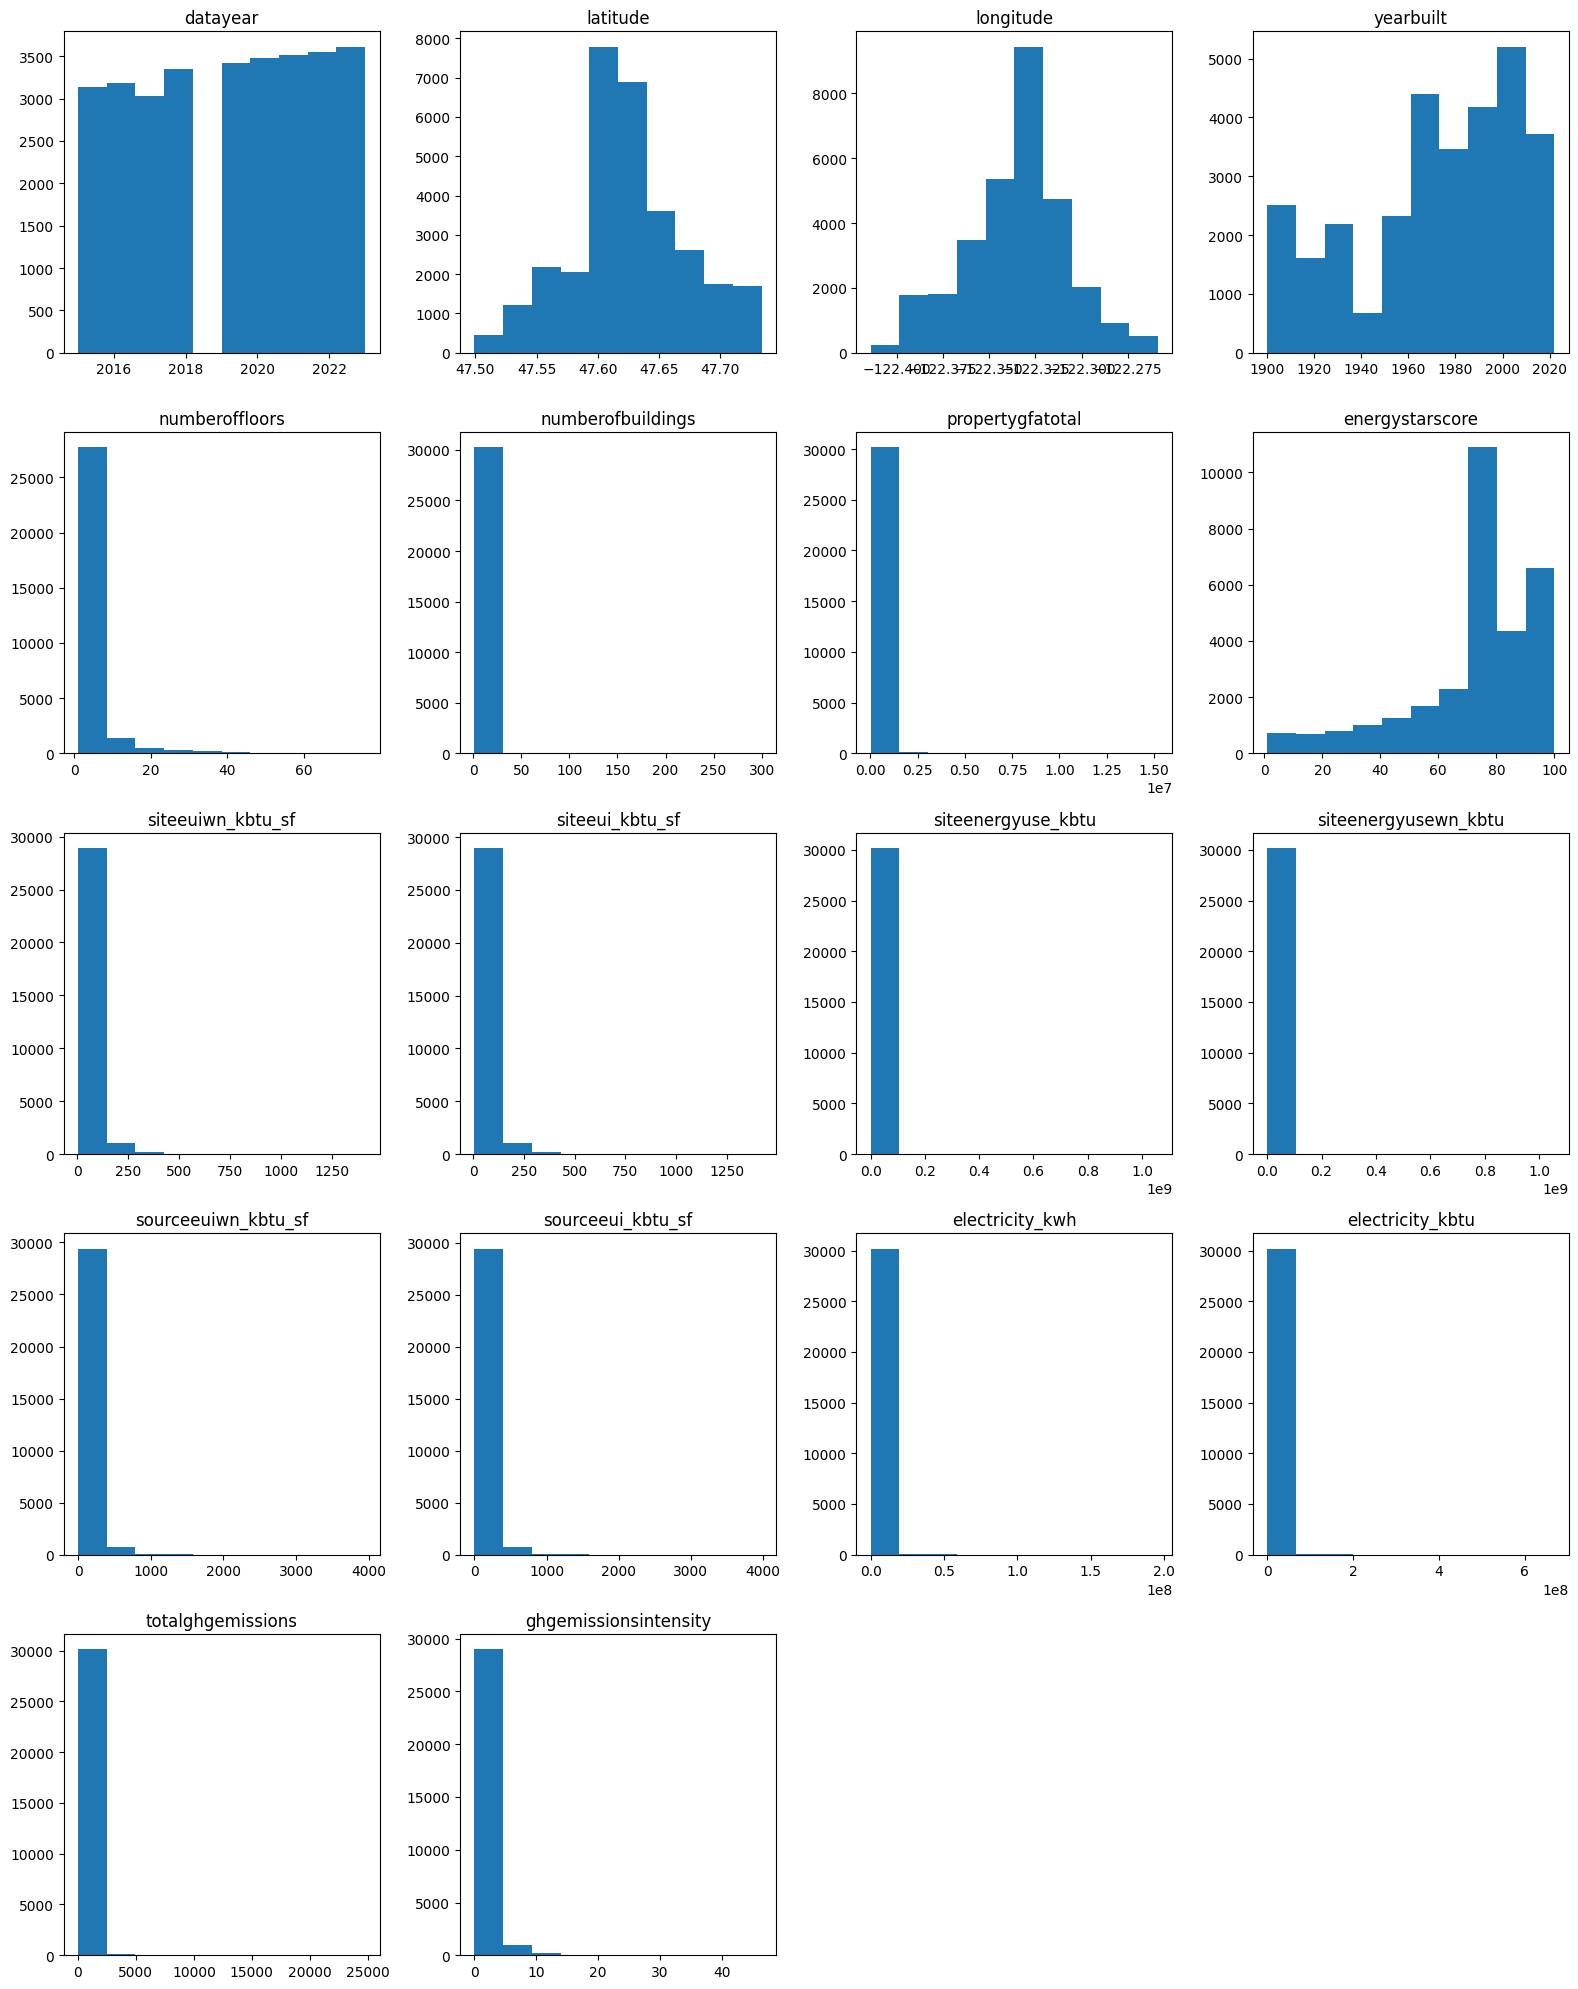

In [34]:
import math
import matplotlib.pyplot as plt

# Supongamos que numeric_cols es una lista de nombres de columnas numéricas
numeric_cols = df.select_dtypes(include='number').columns

ncols = 4
nrows = math.ceil(len(numeric_cols) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(numeric_cols):
    # Graficar un histograma, por ejemplo
    axes[i].hist(df[col_name])
    axes[i].set_title(col_name)

# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


- Como anterior se mostró la gran mayoria de variables numericas tienen colas a la derecha

In [35]:
columnas_numericas_ordinales = ['numberoffloors', 'numberofbuildings', 'datayear', 'yearbuilt', 'energystarscore']

columnas_numericas_continuas = [ item for item in numeric_cols if item not in columnas_numericas_ordinales]

columnas_numericas_continuas

['latitude',
 'longitude',
 'propertygfatotal',
 'siteeuiwn_kbtu_sf',
 'siteeui_kbtu_sf',
 'siteenergyuse_kbtu',
 'siteenergyusewn_kbtu',
 'sourceeuiwn_kbtu_sf',
 'sourceeui_kbtu_sf',
 'electricity_kwh',
 'electricity_kbtu',
 'totalghgemissions',
 'ghgemissionsintensity']

## **Variables continuas**

c:\Proyectos\seatle\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


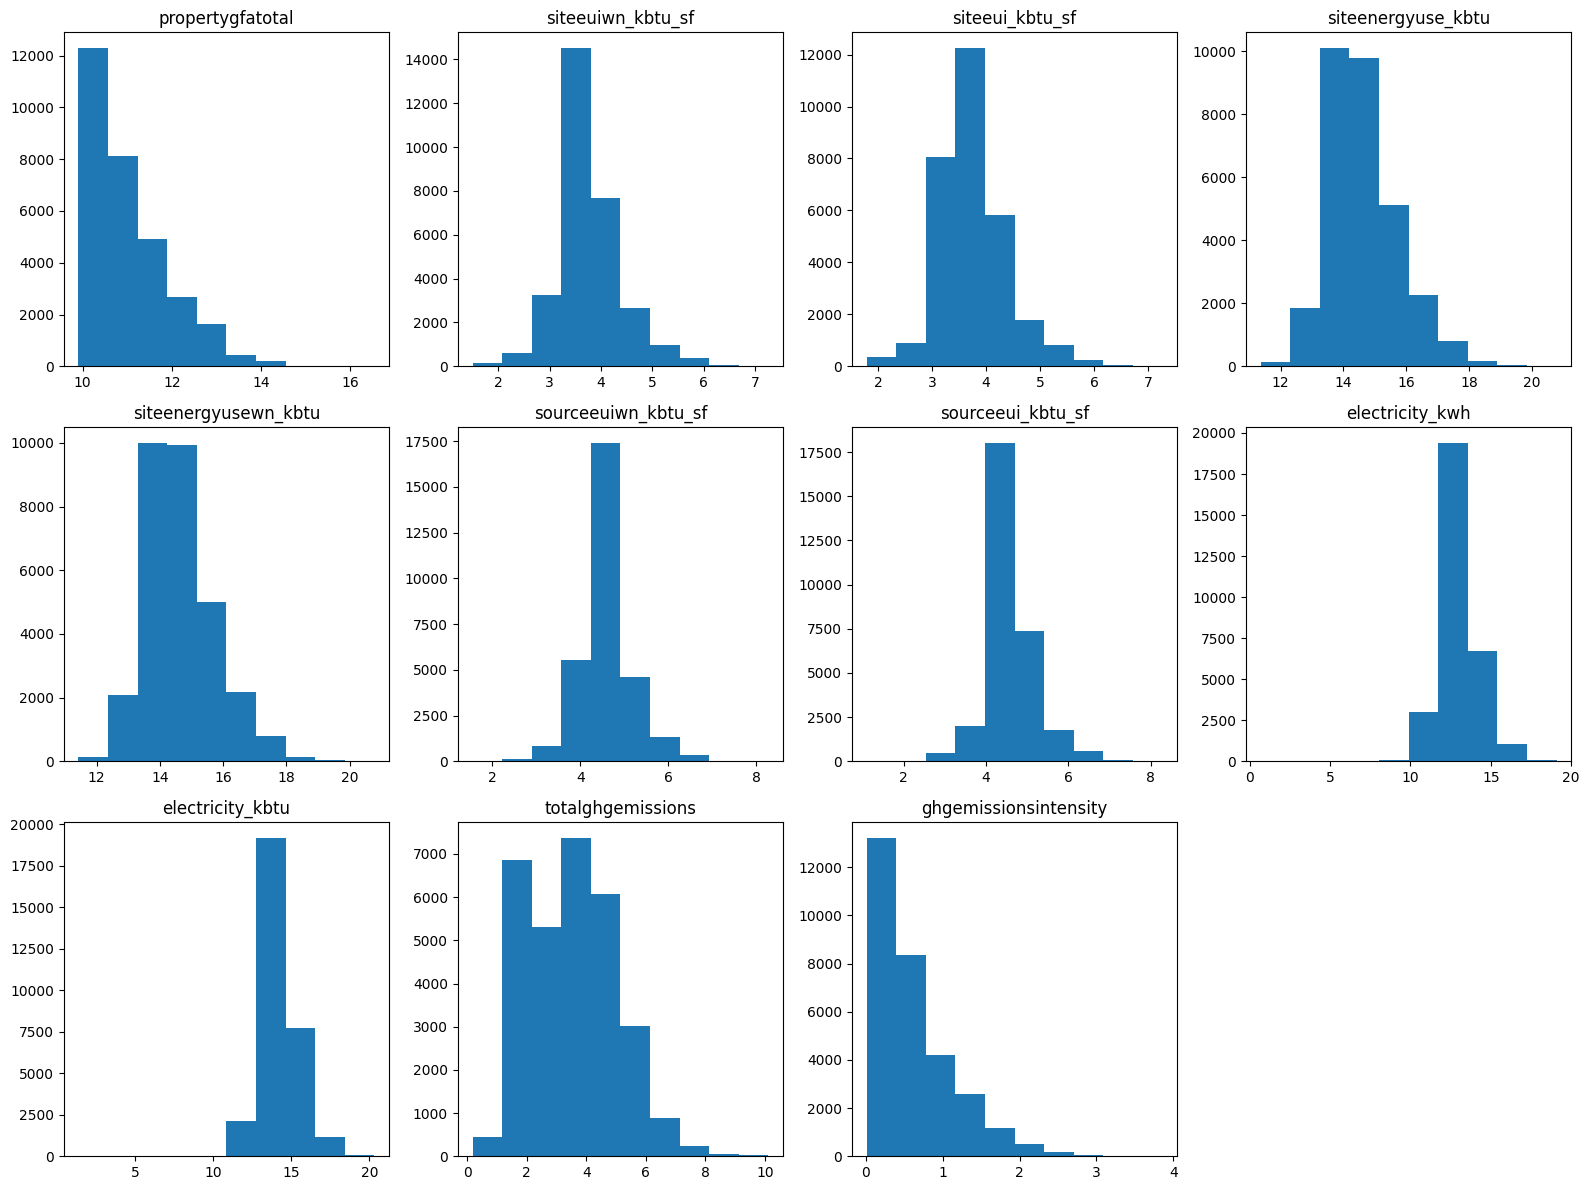

In [36]:

ncols = 4
nrows = math.ceil(len(columnas_numericas_continuas[2:]) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(columnas_numericas_continuas[2:]):
    # Graficar un histograma, por ejemplo
    valores = np.log1p(df[col_name])
    axes[i].hist(valores)
    axes[i].set_title(col_name)

# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

c:\Proyectos\seatle\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Proyectos\seatle\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


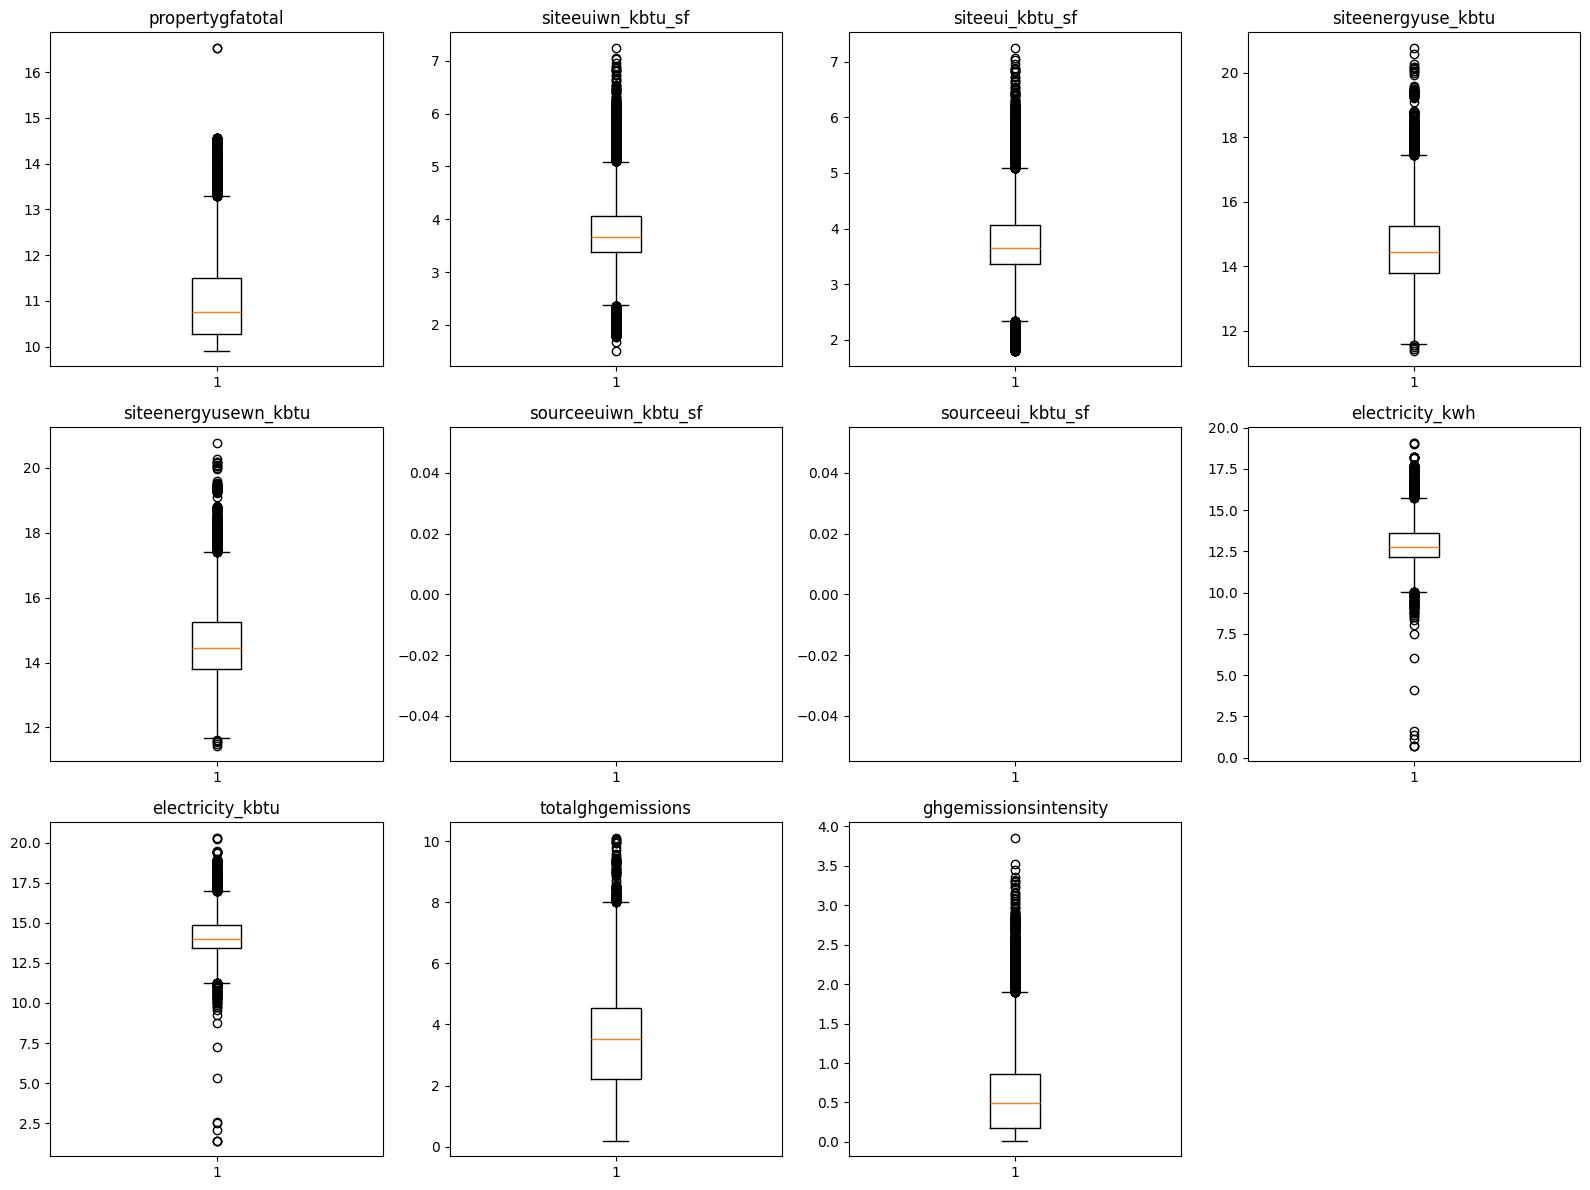

In [37]:

ncols = 4
nrows = math.ceil(len(columnas_numericas_continuas[2:]) / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # Para indexar fácilmente cada subplot

for i, col_name in enumerate(columnas_numericas_continuas[2:]):
    # Graficar un histograma, por ejemplo
    valores = np.log1p(df[col_name])
    axes[i].boxplot(valores)
    axes[i].set_title(col_name)

# Si sobran ejes (subplots) porque la última fila no está completa, puedes ocultarlos:
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

### 🎓 **Conclusion**

- La asimetria de la maayoria de las variables se ve reducida por la aplicación de np.log1p lo que en general es tipico en distribuciones altamente sesgadas como las que tenemos.
- Aún así existen bastantes outliers.
- Lo bueno de esto que varias de estas columnas deben ser eliminadas por su estrecha relación con nuestra variable objetivo.('electricity_kbtu', 'siteenergyuse_kbtu', 'siteenergyusewn_kbtu',
    'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf', 'totalghgemissions', 'ghgemissionsintensity')
- `energystarscore` tiene variabilidad alta lo que quizas podriamos parar utilizando bins
- `yearbuilt` por si sola no tiene mucha información a menos que utilicemos este año para saber el año de la propiedad.
- Transformaremos las variables a np.log1p y además veremos matriz de correlacion y eliminaremos columnas




In [38]:
cols_to_log1p = [
    'electricity_kwh', 'propertygfatotal', 'siteeui_kbtu_sf', 'siteeuiwn_kbtu_sf',
    'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf', 
    'numberoffloors', 'numberofbuildings'
]

for col in cols_to_log1p:
    df[col] = np.log1p(df[col])



c:\Proyectos\seatle\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


### MATRIZ DE CORRELACIÓN

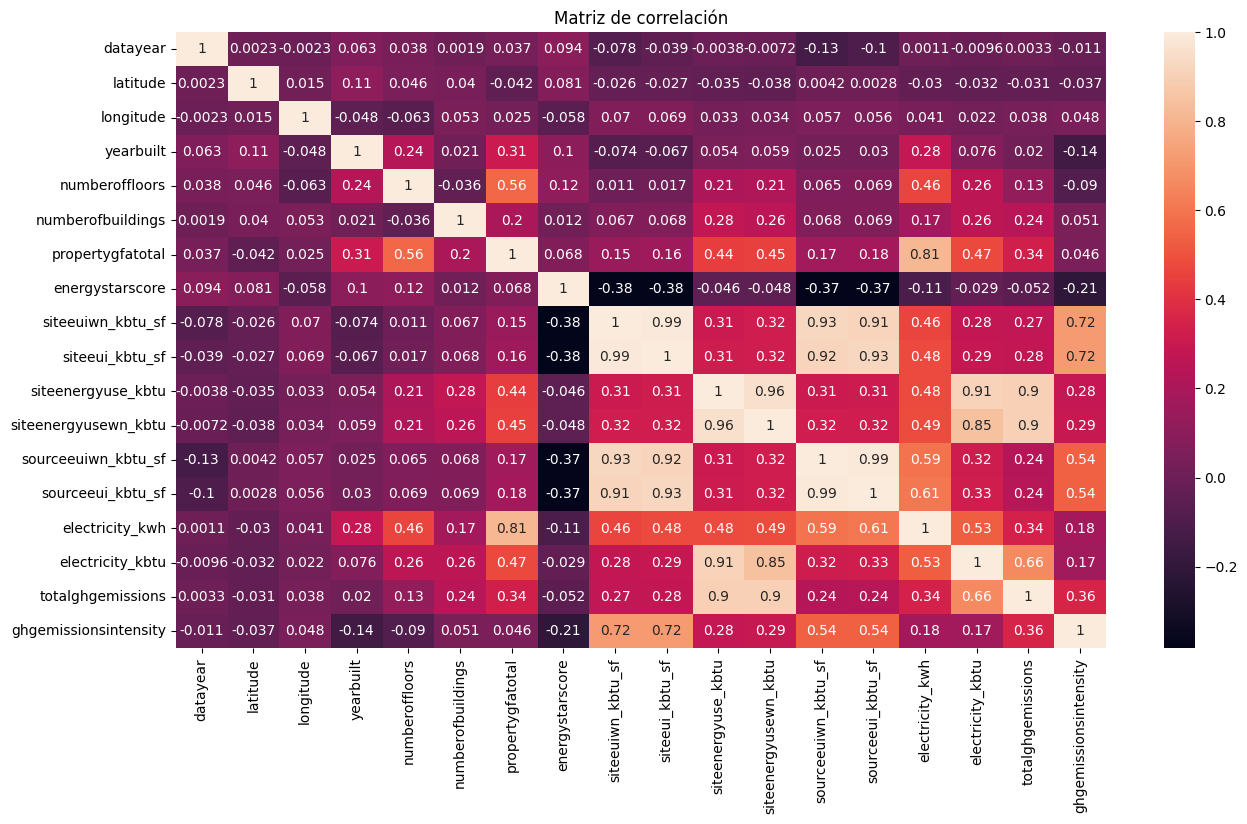

In [39]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()

### 🔍 Análisis de Correlaciones

A partir del análisis de correlación entre las variables numéricas (ver mapa de calor adjunto), se identificó una **alta colinealidad entre múltiples variables energéticas**. Estas relaciones pueden ser problemáticas por dos razones principales:

#### 1. **Multicolinealidad**
- Variables como:
  - `siteeui_kbtu_sf`
  - `siteeuiwn_kbtu_sf`
  - `sourceeui_kbtu_sf`
  - `sourceeuiwn_kbtu_sf`
  - `siteenergyuse_kbtu`
  - `siteenergyusewn_kbtu`
  - `electricity_kbtu`
- muestran correlaciones **superiores a 0.90** entre sí.
- Esto **distorsiona los coeficientes** en modelos lineales y **reduce la interpretabilidad**.


#### 2. **Fuga de Datos (Data Leakage)**
- Algunas variables están altamente correlacionadas con la variable objetivo (`electricity_kwh`), lo que sugiere que contienen **información directa o derivada de ella**:
  - `electricity_kbtu` (conversión directa de `electricity_kwh`)
  - `siteenergyuse_kbtu` (consumo total de energía, incluyendo electricidad)
  - `totalghgemissions` y `ghgemissionsintensity` (derivadas del uso energético)

### 🗑️ Variables a Eliminar

| Variable | Razón |
|----------|-------|
| `electricity_kbtu` | Fuga directa de datos (`1 kWh ≈ 3.412 BTU`) |
| `siteenergyuse_kbtu` | Suma total de fuentes energéticas (incluye electricidad) |
| `siteenergyusewn_kbtu` | Versión ajustada del anterior |
| `sourceeui_kbtu_sf` | Intensidad energética por superficie (incluye electricidad) |
| `sourceeuiwn_kbtu_sf` | Igual que anterior, con ajuste climático |
| `totalghgemissions` | Altamente correlacionado con uso energético |
| `ghgemissionsintensity` | Derivada de las emisiones totales |


In [40]:
df.drop(columns=['electricity_kbtu','siteenergyuse_kbtu', 'siteenergyusewn_kbtu', 'totalghgemissions', 'ghgemissionsintensity', 'sourceeui_kbtu_sf', 'sourceeuiwn_kbtu_sf', 'siteeui_kbtu_sf'], axis=1, inplace=True)

In [41]:
df.select_dtypes(include='number').corr().loc['electricity_kwh'].sort_values()

energystarscore     -0.109149
latitude            -0.029913
datayear             0.001104
longitude            0.041375
numberofbuildings    0.174589
yearbuilt            0.284067
numberoffloors       0.461525
siteeuiwn_kbtu_sf    0.463959
propertygfatotal     0.812009
electricity_kwh      1.000000
Name: electricity_kwh, dtype: float64

In [42]:
df['año_construcción'] = 2025 - df['yearbuilt']

df.drop(columns='yearbuilt', axis=1, inplace=True)


In [43]:
df['energystarscore'] = pd.cut(df['energystarscore'], 3, labels=["bad", "medium", "good"])

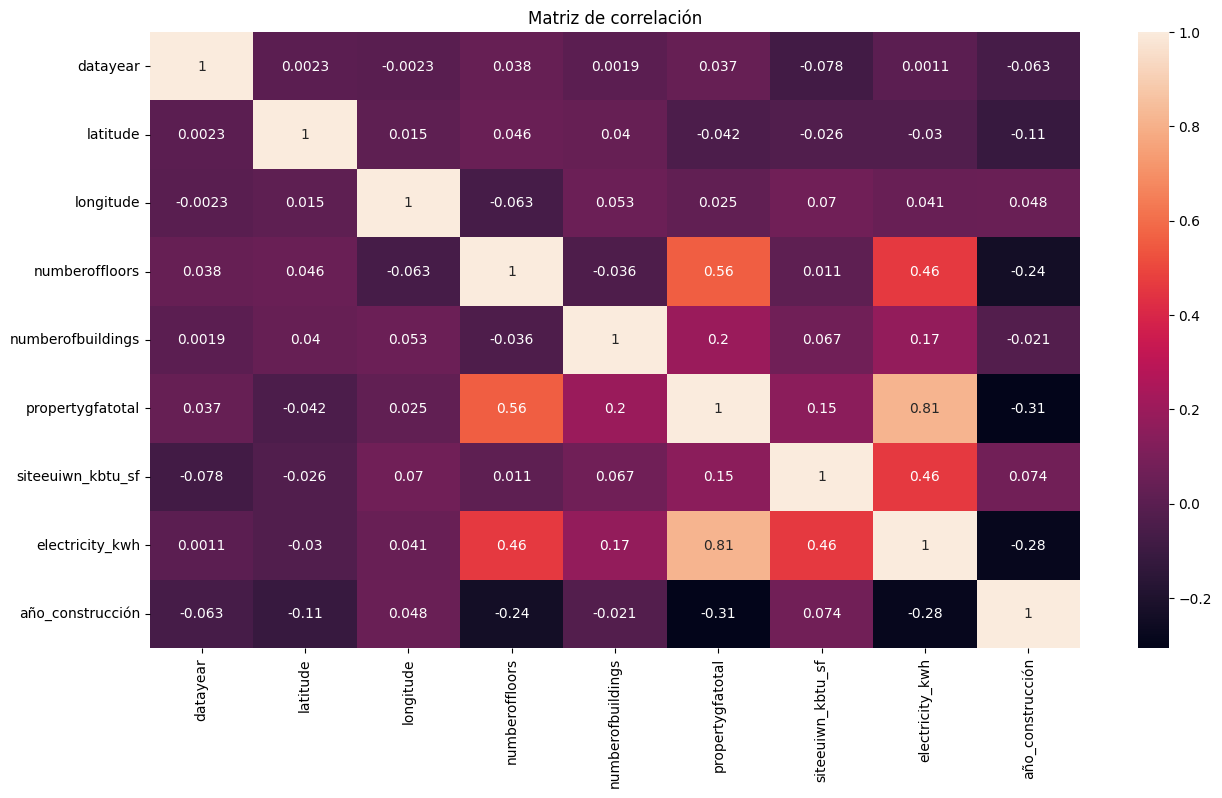

In [44]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title('Matriz de correlación')
plt.show()

## **COLUMNAS CATEGORICAS**

In [47]:
categorical_cols = df.select_dtypes(include=['object'])
categorical_cols

,buildingtype,neighborhood,epapropertytype,compliancestatus,complianceissue
0,Nonresidential,Downtown,Hotel,Compliant,No Issue
1,Nonresidential,Downtown,Hotel,Compliant,No Issue
2,Nonresidential,Downtown,Hotel,Compliant,No Issue
3,Nonresidential,Downtown,Hotel,Compliant,No Issue
4,Nonresidential,Downtown,Hotel,Compliant,No Issue
...,...,...,...,...,...
30652,Nonresidential,Magnolia / Queen Anne,Mixed Use Property,Compliant,No Issue
30653,Multifamily Lr (1-4),Downtown,Multifamily Lr (1-4),Compliant,No Issue
30654,Multifamily Mr (5-9),Northeast,Multifamily Mr (5-9),Compliant,No Issue
30655,Multifamily Hr (10+),Downtown,Multifamily Hr (10+),Compliant,No Issue


In [48]:
for col in categorical_cols:

    print(f'La cantidad de categorias para la {col} es de {df[col].nunique()}')

La cantidad de categorias para la buildingtype es de 6
La cantidad de categorias para la neighborhood es de 13
La cantidad de categorias para la epapropertytype es de 69
La cantidad de categorias para la compliancestatus es de 2
La cantidad de categorias para la complianceissue es de 11


🔍 **Observación**

Aqui lo más problemático es que `epapropertytype` tiene 69 posibles categorias lo que es bastante. Por esta razon una estrategia valida me parece reemplazar esta categoria por su frecuencia

In [49]:
frecuencia = df['epapropertytype'].value_counts()
df['epapropertytype_encoded'] = df['epapropertytype'].map(frecuencia)
df.drop(columns='epapropertytype', inplace=True)


<Axes: >

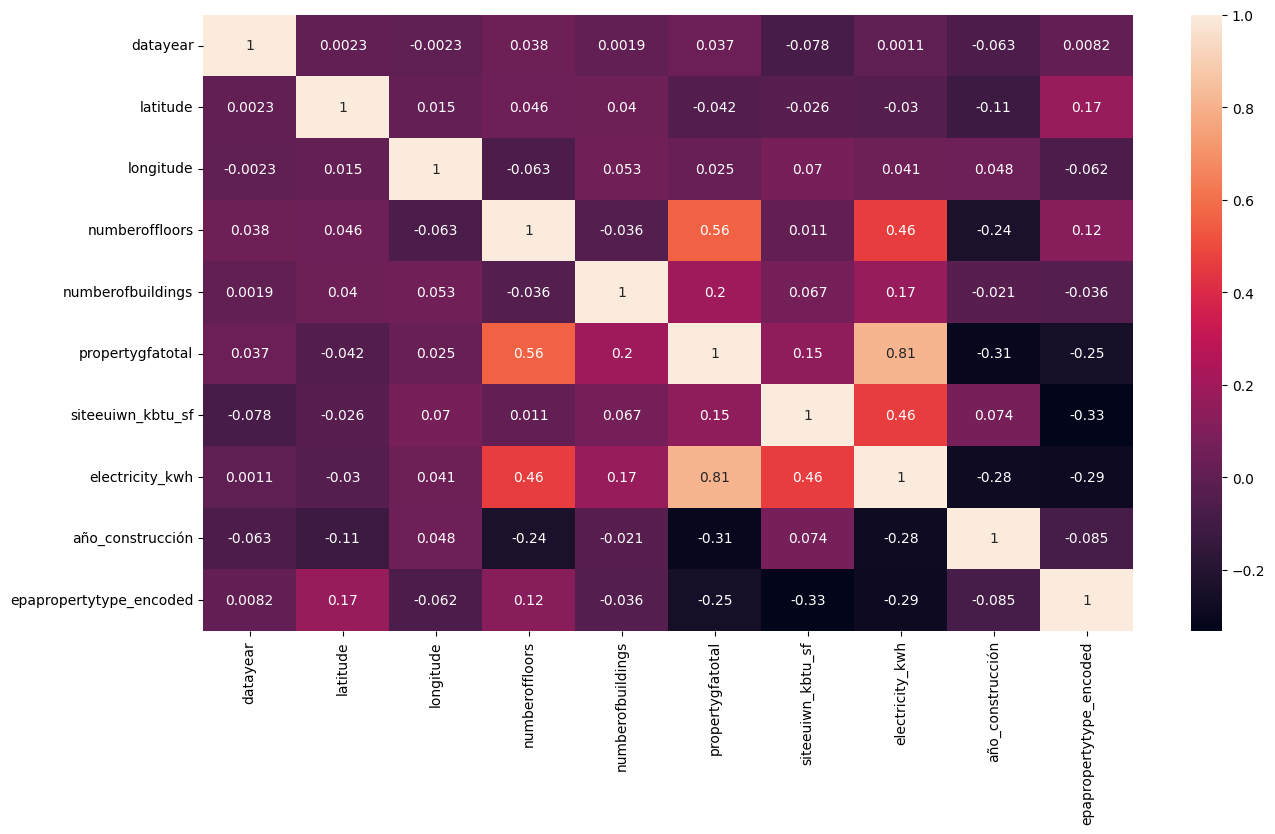

In [50]:
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

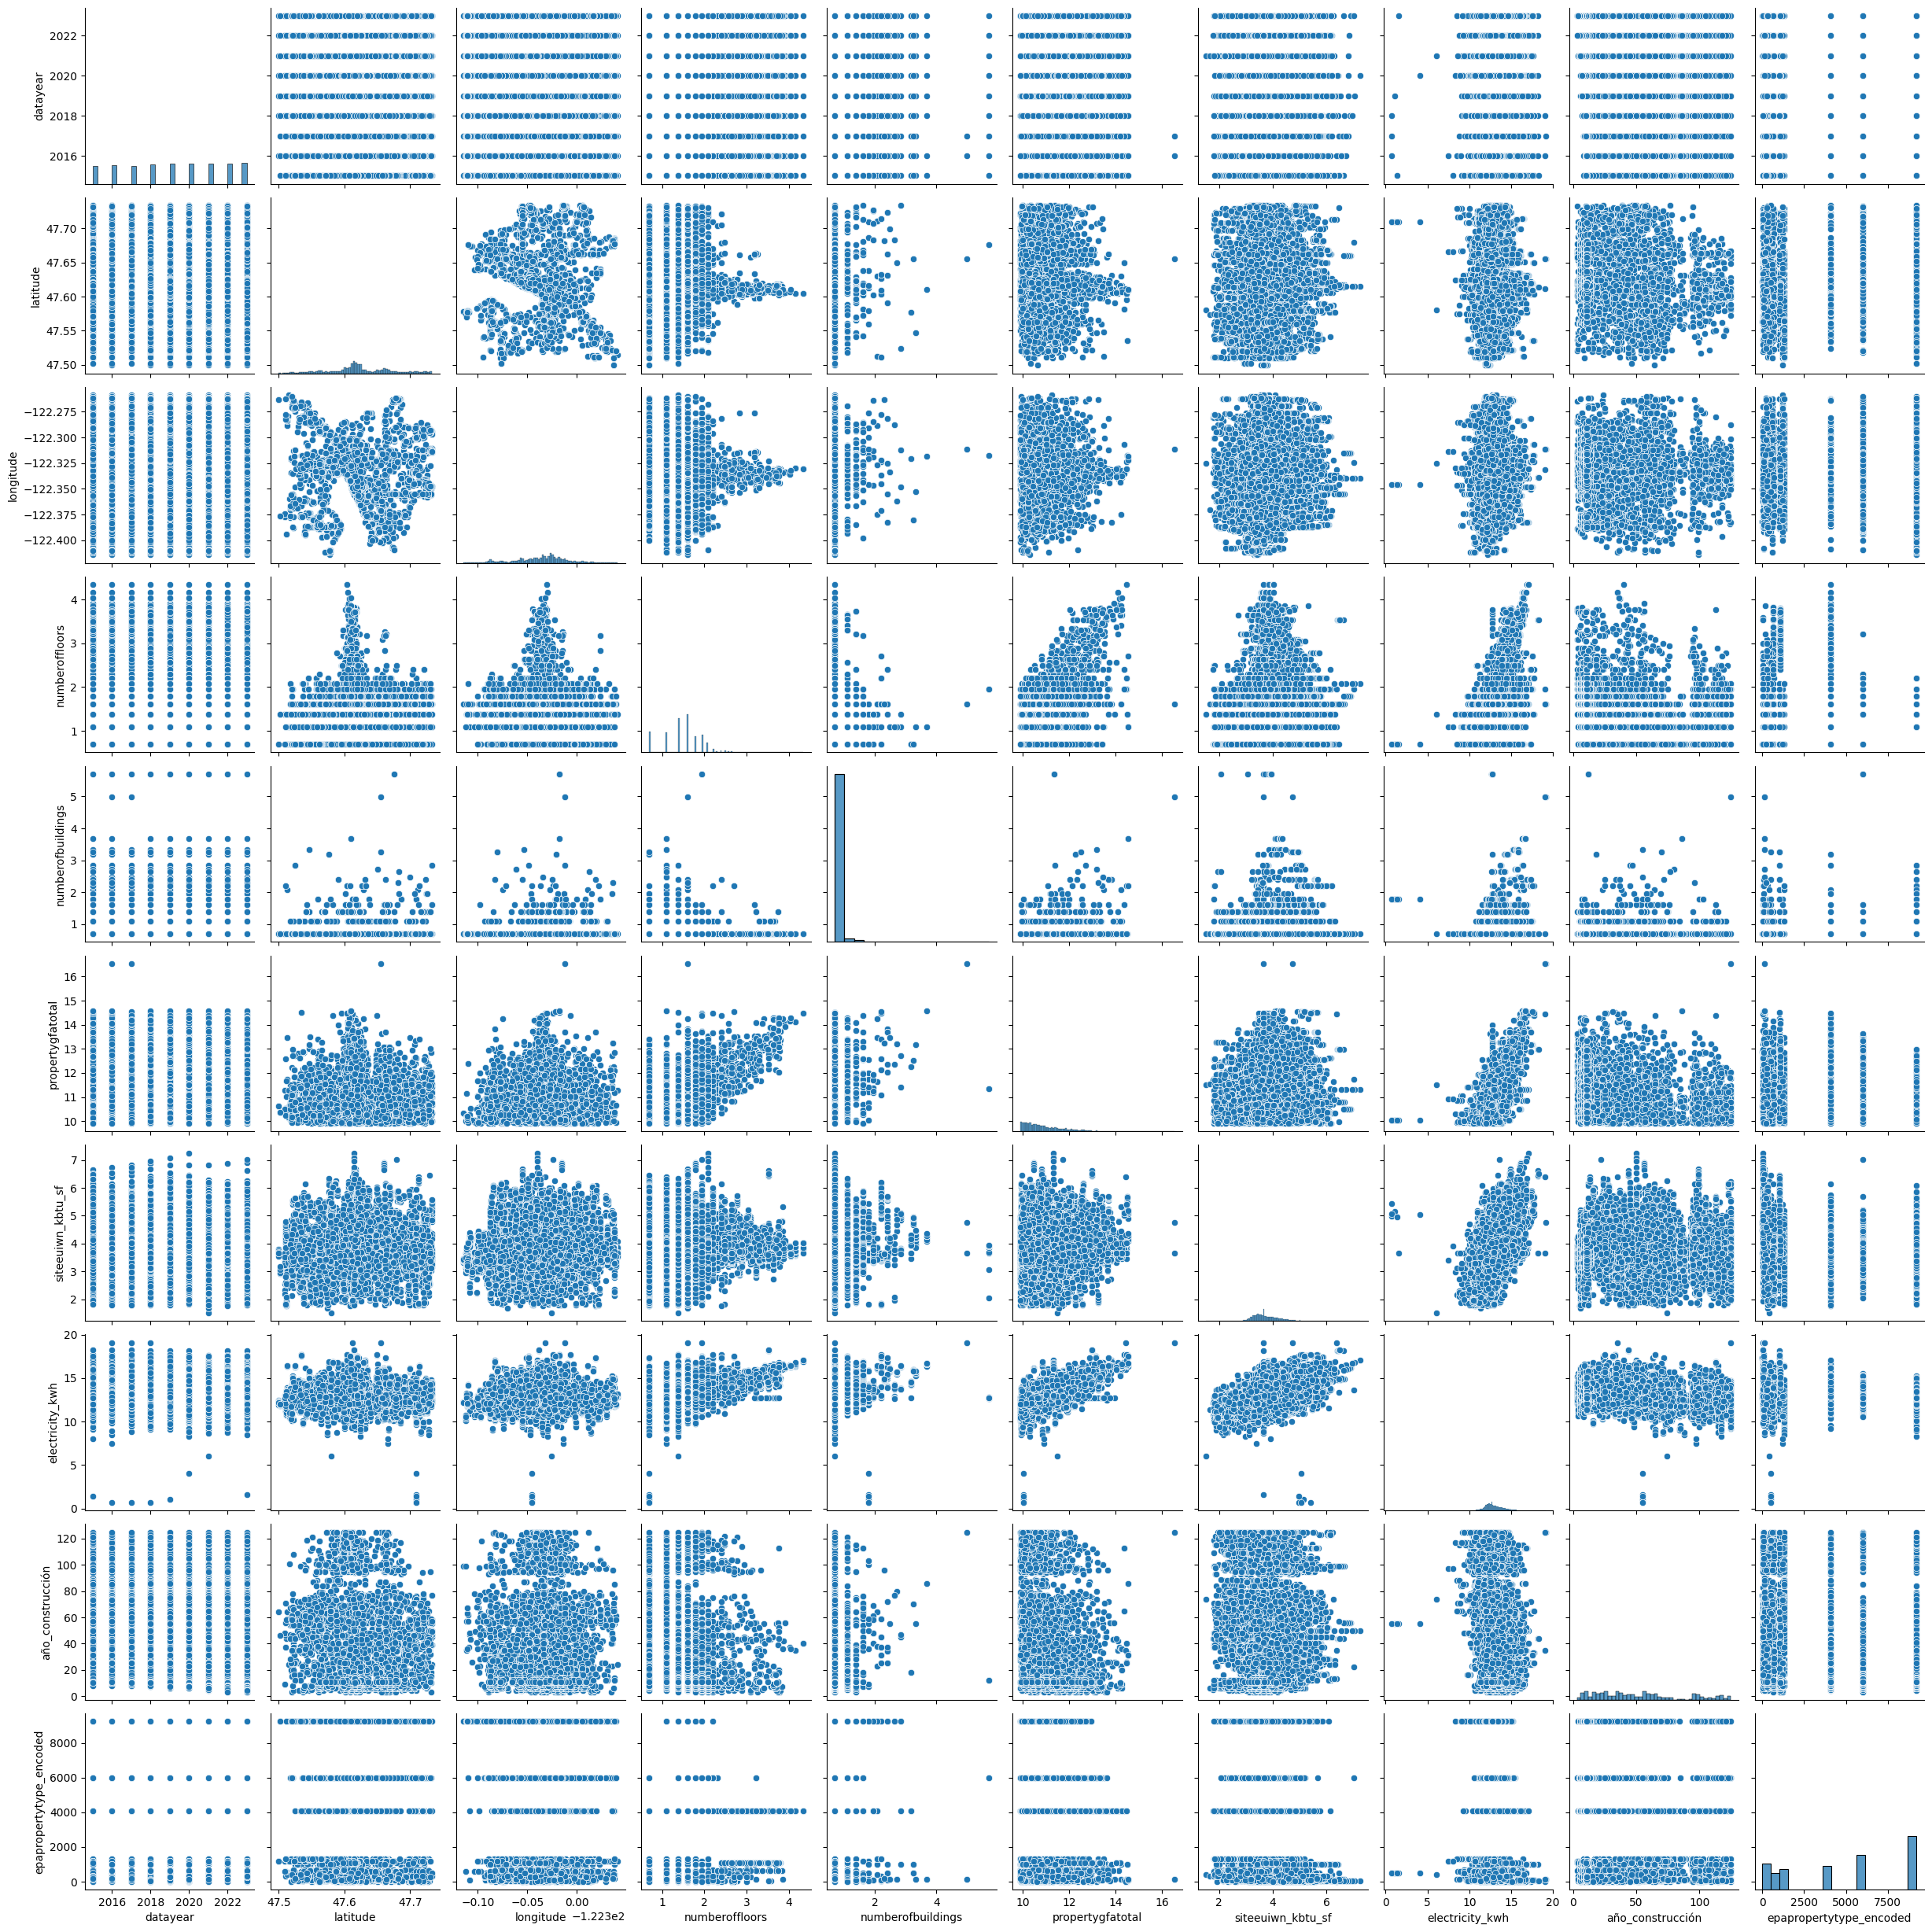

In [51]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [52]:
categorical_cols = ['buildingtype', 'neighborhood', 'compliancestatus', 'complianceissue']

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Transofrmando las variables categoricas
encoding = OneHotEncoder(sparse_output=False)

encoded_data = encoding.fit_transform(df[categorical_cols])
nuevos_nombres_columnas = encoding.get_feature_names_out()

df_encoded = pd.DataFrame(encoded_data, columns=nuevos_nombres_columnas, index=df.index)

# Trasnformando la variable energystarscore
label_enc = LabelEncoder()
df['energystarscore_encoded'] = label_enc.fit_transform(df['energystarscore'])

# 3. Concatenar con el dataframe original (y opcionalmente eliminar las originales)
df_final = pd.concat([df.drop(columns=categorical_cols + ['energystarscore']), df_encoded, df['energystarscore_encoded']], axis=1)



In [54]:
df_numerico = df_final.select_dtypes(include='number')

In [55]:
df_numerico

,datayear,latitude,longitude,numberoffloors,numberofbuildings,propertygfatotal,siteeuiwn_kbtu_sf,electricity_kwh,año_construcción,epapropertytype_encoded,energystarscore_encoded,buildingtype_Campus,buildingtype_Multifamily Hr (10+),buildingtype_Multifamily Lr (1-4),buildingtype_Multifamily Mr (5-9),buildingtype_Nonresidential,buildingtype_Sps-District K-12,neighborhood_Ballard,neighborhood_Central,neighborhood_Delridge Neighborhoods,neighborhood_Downtown,neighborhood_East,neighborhood_Greater Duwamish,neighborhood_Lake Union,neighborhood_Magnolia / Queen Anne,neighborhood_North,neighborhood_Northeast,neighborhood_Northwest,neighborhood_Southeast,neighborhood_Southwest,compliancestatus_Compliant,compliancestatus_Not Compliant,complianceissue_Account Requires Verification,complianceissue_Default Data,complianceissue_Missing Data,complianceissue_Missing Eui Or Electricity Data,complianceissue_Missing Eui Or Utility Data,complianceissue_Missing Eui Or Utility Data And Account Requires Verification,"complianceissue_Missing Eui, Incomplete Electricity Data","complianceissue_Missing Eui, Incomplete Fuel Data","complianceissue_Missing Eui, Incomplete Natural Gas Data",complianceissue_No Issue,complianceissue_Portfolio Manager Not Connected To The City Of Seattle,energystarscore_encoded
0,2023,47.61220,-122.33799,2.564949,0.693147,11.390023,4.504244,13.861555,98,654,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
1,2023,47.61307,-122.33361,2.484907,0.693147,11.547974,4.317488,13.575015,29,654,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2023,47.61367,-122.33822,3.737670,1.386294,13.770629,4.364372,16.224358,56,654,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,2023,47.61412,-122.33664,2.397895,0.693147,11.023878,4.406719,13.567281,99,654,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2
4,2023,47.61375,-122.34047,2.944439,0.693147,12.075856,4.653960,14.153174,45,654,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30652,2015,47.66144,-122.38723,1.098612,0.693147,10.147727,3.404525,12.123973,11,1004,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30653,2015,47.59980,-122.32034,1.609438,0.693147,10.706632,3.360375,12.721826,25,9230,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30654,2015,47.65756,-122.31584,2.079442,0.693147,10.654762,4.027136,12.693750,11,5998,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
30655,2015,47.61652,-122.33735,3.713572,0.693147,12.674456,4.133565,14.340455,10,1084,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [56]:
df_numerico.shape

(30280, 44)

---

#  **MODELOS**

In [57]:
X = df_final.drop(columns='electricity_kwh')
y = df_final[['electricity_kwh']]

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,y, random_state=32, shuffle=True, train_size=0.8)

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)  

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error


# Diccionario con varios modelos de regresión

models = {
    'linear_regresion': LinearRegression(),
    'ridge_regression': Ridge(alpha=1.0),
    'lasso_regression':  Lasso(alpha=0.001),
    'bayesian_ridge': BayesianRidge(),
    'knn_regressor': KNeighborsRegressor(),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(),
    'gradient_boosting': GradientBoostingRegressor(),
    'svr': SVR()
}

# Diccionarios para guardar las métricas
r2_score_train = dict()
r2_score_test = dict()
rmse_score = dict()

for name, model in models.items():

    #########################
    # Entrenando y predecir #
    #########################

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)

    r_score_test_ = r2_score(y_test, y_pred_test)

    y_pred_train = model.predict(X_train)

   
    ############
    # Metricas #
    ############ 

    r_score_train_ = r2_score(y_train, y_pred_train)

    rmse = root_mean_squared_error(y_test, y_pred_test)

    r2_score_train[name] = r_score_train_

    r2_score_test[name] = r_score_test_
    
    rmse_score[name] = rmse

print(r2_score_test, 'test')
print(r2_score_train, 'train')




c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\ensemble\_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

{'linear_regresion': 0.8053579984543257, 'ridge_regression': 0.8053574459534779, 'lasso_regression': 0.8051450204263055, 'bayesian_ridge': 0.8053511215825739, 'knn_regressor': 0.8607631379398503, 'decision_tree': 0.9249367379639375, 'random_forest': 0.9556270435278459, 'gradient_boosting': 0.8714712012993268, 'svr': 0.861929856567015} test
{'linear_regresion': 0.7997621353081434, 'ridge_regression': 0.7997621322680146, 'lasso_regression': 0.7996410095153125, 'bayesian_ridge': 0.7997617178300265, 'knn_regressor': 0.9159320974103464, 'decision_tree': 1.0, 'random_forest': 0.9940373575270262, 'gradient_boosting': 0.8837753903853547, 'svr': 0.8676298701809466} train


In [ ]:
results_df = pd.DataFrame({
    'R2 Train': r2_score_train,
    'R2 Test': r2_score_test,
    'RMSE Test': rmse_score
})

# Ordenar por R2 Test descendente (mejor modelo primero)
results_df = results_df.sort_values(by='R2 Test', ascending=False)

# Mostrar resultados
results_df

,R2 Train,R2 Test,RMSE Test
random_forest,0.994037,0.955627,0.246130
decision_tree,1.000000,0.924937,0.320124
gradient_boosting,0.883775,0.871471,0.418895
svr,0.867630,0.861930,0.434165
knn_regressor,0.915932,0.860763,0.435996
linear_regresion,0.799762,0.805358,0.515494
ridge_regression,0.799762,0.805357,0.515495
bayesian_ridge,0.799762,0.805351,0.515503
lasso_regression,0.799641,0.805145,0.515776


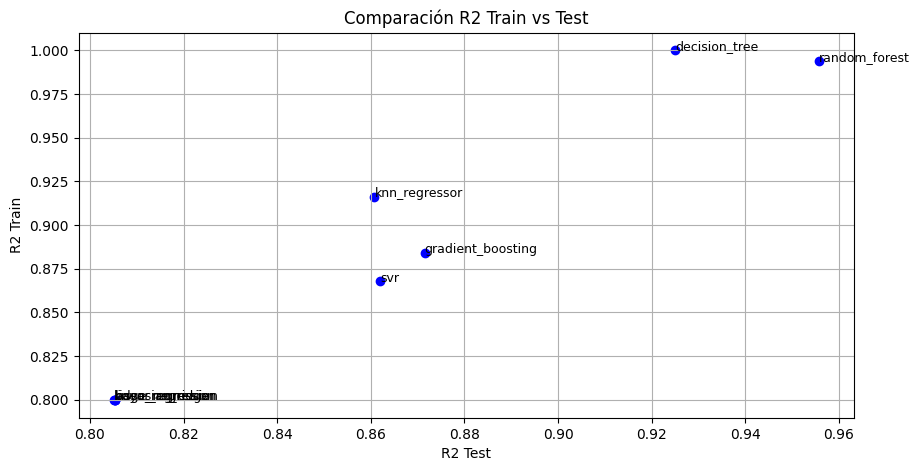

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(r2_score_test.values(), r2_score_train.values(), c='blue')
for name in r2_score_test:
    plt.text(r2_score_test[name], r2_score_train[name], name, fontsize=9)
plt.xlabel('R2 Test')
plt.ylabel('R2 Train')
plt.title('Comparación R2 Train vs Test')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score

# Parámetros para Random Forest
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Definir el modelo base
model = RandomForestRegressor(random_state=42)

# Randomized Search inteligente
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=params,
    n_iter=30,                       
    scoring='r2',                   
    cv=5,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Entrenar
random_search.fit(X_train, y_train.values.ravel())

# Mejor modelo
print("🔍 Mejor combinación de parámetros:")
print(random_search.best_params_)
print(f"✅ Mejor score (R²): {random_search.best_score_:.4f}")


Fitting 5 folds for each of 30 candidates, totalling 150 fits
🔍 Mejor combinación de parámetros:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
✅ Mejor score (R²): 0.9566


In [ ]:
# Convertimos los resultados en un DataFrame ordenado por score
resultados = pd.DataFrame(random_search.cv_results_)

# Ordenar por el mejor score (de mayor a menor)
resultados_ordenados = resultados.sort_values(by='mean_test_score', ascending=False)

# Mostrar los primeros (puedes ajustar a más filas si quieres)
resultados_ordenados[['mean_test_score', 'std_test_score', 'params']].head(10)


,mean_test_score,std_test_score,params
16,0.956568,0.006562,"{'n_estimators': 200, 'min_samples_split': 5, ..."
24,0.951691,0.006418,"{'n_estimators': 200, 'min_samples_split': 2, ..."
21,0.948334,0.004776,"{'n_estimators': 100, 'min_samples_split': 2, ..."
4,0.947992,0.005271,"{'n_estimators': 300, 'min_samples_split': 5, ..."
27,0.947800,0.005340,"{'n_estimators': 200, 'min_samples_split': 5, ..."
28,0.943386,0.005046,"{'n_estimators': 200, 'min_samples_split': 10,..."
25,0.941497,0.005428,"{'n_estimators': 300, 'min_samples_split': 2, ..."
13,0.941291,0.005355,"{'n_estimators': 200, 'min_samples_split': 2, ..."
6,0.940757,0.006258,"{'n_estimators': 100, 'min_samples_split': 2, ..."
3,0.940078,0.004522,"{'n_estimators': 100, 'min_samples_split': 5, ..."


In [ ]:
from sklearn.metrics import r2_score

best_rf = random_search.best_estimator_
y_pred_test = best_rf.predict(X_test)

print(f"en test final: {r2_score(y_test, y_pred_test):.4f}")

en test final: 0.9589


In [ ]:
best_model = random_search.best_estimator_

best_model.feature_importances_


array([7.19100074e-03, 4.54230378e-02, 4.24736909e-02, 9.78145782e-02,
       2.37349051e-02, 3.65811892e-01, 1.35815991e-01, 1.06988073e-03,
       7.56756743e-02, 6.99038001e-02, 6.53256795e-03, 1.19210172e-02,
       5.55156392e-03, 2.49505493e-02, 7.74694299e-03, 1.53987198e-02,
       1.44214984e-03, 1.43653229e-03, 1.82297481e-03, 1.13843517e-03,
       2.15207237e-02, 3.80319636e-03, 3.57526552e-03, 3.60242672e-03,
       2.71194084e-03, 1.29045968e-03, 1.86369390e-03, 3.23112105e-03,
       1.17638146e-03, 1.57262658e-03, 1.04700689e-03, 1.14908934e-03,
       6.56576862e-04, 3.55096015e-04, 1.39389098e-05, 3.49646779e-04,
       1.71864168e-04, 2.39166266e-05, 0.00000000e+00, 4.37627935e-04,
       4.60477338e-04, 1.08278144e-03, 4.11220028e-04, 6.63701827e-03])

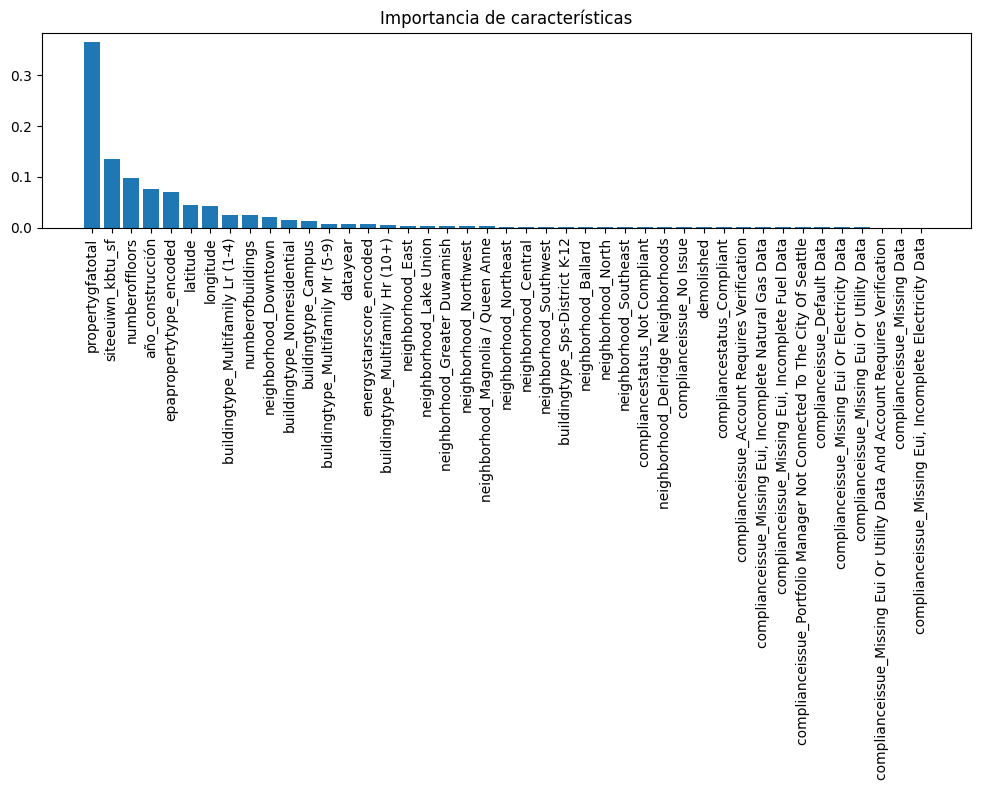

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_fi = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
})

df_fi = df_fi.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.bar(df_fi['feature'], df_fi['importance'])
plt.xticks(rotation=90)  # Girar las etiquetas para que se lean mejor
plt.title('Importancia de características')
plt.tight_layout()       # Ajusta el espacio para que quepan las etiquetas
plt.show()

In [ ]:
print(f'{X.shape}{y.shape}')

(30280, 41)(30280, 1)


In [ ]:
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y)


In [ ]:
from torch.utils.data import Dataset, DataLoader
import torch


class ElectricityConsumption(Dataset):
    def __init__(self, X, y):
        self.features = torch.tensor(X_scaled, dtype=torch.float32)
        self.labels = torch.tensor(y_scaled, dtype=torch.float32)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

train_dataset = ElectricityConsumption(X_train, y_train)
test_dataset = ElectricityConsumption(X_test, y_test)

dataloader_train = DataLoader(train_dataset, batch_size=32, shuffle=True)
dataloader_test = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
import torch.nn as nn
import torch.optim as optim

class Net(nn.Module):

    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.Linear(64, 32),
            nn.ReLU(),
            
            nn.Linear(32, 1)  # salida de regresión
        )


    def forward(self, x):
        return self.net(x)
    

sample_features, _ = next(iter(dataloader_train))  
input_dim = sample_features.shape[1]

model = Net(input_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)



for epoch in range(50):
	
    epoch_loss = 0.0  # esto va dentro del loop

    for features, labels in dataloader_train:
        
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(
            outputs, labels.view(-1, 1)
            )

        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f"Epoch [{epoch+1}/20], Loss: {epoch_loss:.4f}")


    


Epoch [1/20], Loss: 619.4964
Epoch [2/20], Loss: 513.9357
Epoch [3/20], Loss: 495.1082
Epoch [4/20], Loss: 422.4623
Epoch [5/20], Loss: 390.6113
Epoch [6/20], Loss: 402.3943
Epoch [7/20], Loss: 375.4890
Epoch [8/20], Loss: 386.2654
Epoch [9/20], Loss: 354.3192
Epoch [10/20], Loss: 324.7534
Epoch [11/20], Loss: 341.6029
Epoch [12/20], Loss: 347.3548
Epoch [13/20], Loss: 352.3917
Epoch [14/20], Loss: 360.9659
Epoch [15/20], Loss: 340.3620
Epoch [16/20], Loss: 319.1718
Epoch [17/20], Loss: 322.4388
Epoch [18/20], Loss: 306.5208
Epoch [19/20], Loss: 322.3905
Epoch [20/20], Loss: 333.2935
Epoch [21/20], Loss: 298.4814
Epoch [22/20], Loss: 307.5607
Epoch [23/20], Loss: 333.8210
Epoch [24/20], Loss: 304.7266
Epoch [25/20], Loss: 337.4261
Epoch [26/20], Loss: 318.1960
Epoch [27/20], Loss: 323.8139
Epoch [28/20], Loss: 303.4800
Epoch [29/20], Loss: 284.8209
Epoch [30/20], Loss: 304.2085
Epoch [31/20], Loss: 316.2238
Epoch [32/20], Loss: 286.5659
Epoch [33/20], Loss: 301.3355
Epoch [34/20], Loss

In [ ]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Paso 1: Pon el modelo en modo evaluación
model.eval()

# Paso 2: Recolectar predicciones y verdaderos
y_true = []
y_pred = []

with torch.no_grad():
    for features, labels in dataloader_test:  # <-- usa aquí tu dataloader de test
        outputs = model(features)
        y_true.append(labels.view(-1, 1))
        y_pred.append(outputs)

y_true = torch.cat(y_true, dim=0).numpy()
y_pred = torch.cat(y_pred, dim=0).numpy()

y_true = scaler_y.inverse_transform(y_true)
y_pred = scaler_y.inverse_transform(y_pred)

r2 = r2_score(y_true, y_pred)
print(f"R² Score: {r2:.4f}")

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


R² Score: 0.7118
RMSE: 1793884.05
MAE: 424848.31


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, ReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 3. Crear el modelo
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    
    Dense(64),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    
    Dense(32),
    ReLU(),
    
    Dense(1)  # salida de regresión
])

# 4. Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# 5. Entrenar el modelo
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50


c:\Proyectos\seatle\myenv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


606/606 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11492482088960.0000 - val_loss: 8582490226688.0000
Epoch 2/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17486501117952.0000 - val_loss: 8562437783552.0000
Epoch 3/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12456040595456.0000 - val_loss: 8513521188864.0000
Epoch 4/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13492000129024.0000 - val_loss: 8460812419072.0000
Epoch 5/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11471985573888.0000 - val_loss: 8347362263040.0000
Epoch 6/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15725434503168.0000 - val_loss: 8191513460736.0000
Epoch 7/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9350248660992.0000 - val_loss: 8082494586880.0000
Epoch 8/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16212865056768.0000 - val_loss: 7817953017856.0000
Epoch 9/50
606/606 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11899534049280.0000 - val_loss: 7691631067136.0000
Epoch 10/50
6

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predecir
y_pred = model.predict(X_test)

# De

# Métricas
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")


190/190 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step
RMSE: 1291024.17
MAE: 665443.69
R²: 0.7312


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_rf_pred = rf.predict(X_test)

r2_rf = r2_score(y_test, y_rf_pred)
print(f"Random Forest R²: {r2_rf:.4f}")


c:\Proyectos\seatle\myenv\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest R²: 0.9672
